In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import _epconfig_local

In [105]:

# # option 2 penalty: find the dips
#
#
# def calc_dip_penalty_weights(x, delta_threshold=0.):
#     penalty_wgts = np.zeros(len(x))
#     for i in range(len(x)):
#         x_end_i = x[i]
#         for j in range(i+2, len(x)):
#             x_end_j = x[j]
#             if all([x[k]< x_end_i+delta_threshold and x[k] < x_end_j+delta_threshold for k in range(i+1,j)]):
#                 # we have a dip
#                 penalty_wgts[i] = penalty_wgts[i]+j-i-1
#                 penalty_wgts[j] = penalty_wgts[j]+j-i-1
#                 for k in range(i+1,j):
#                     penalty_wgts[k] = penalty_wgts[k]-2
#
#     return penalty_wgts
#
# def calc_dip_penalty_weights_twosided(x):
#     pen_dips = calc_dip_penalty_weights(x)
#     if np.all(pen_dips==0):
#         pen_dips = calc_dip_penalty_weights(-x)
#     return pen_dips
# print('test #1',calc_dip_penalty_weights([2,1,10]))
#
# print('test #2a',calc_dip_penalty_weights([2,1,11,1,1,1,1]))




In [106]:
np.arctan(1)/np.pi*180

45.0

C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sign(self.c)*1./(-self.b/2/self.c - 1)**2
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:115: RuntimeWarning: invalid value encountered in double_scalars
  jac_manual_2 = (-quad_fit.calc_dip_metric2() +
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  jac = np.sign(self.c)*self.factor/self.denom*np.array([
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:70: RuntimeWarning: invalid value encountered in multiply
  jac = np.sign(self.c)*self.factor/self.denom*np.array([
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:70: RuntimeWarning: invalid value encountered in double_scalars
  jac = np.sign(self.c)*self.factor/self.denom*np.array([
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:104: RuntimeWarning: M

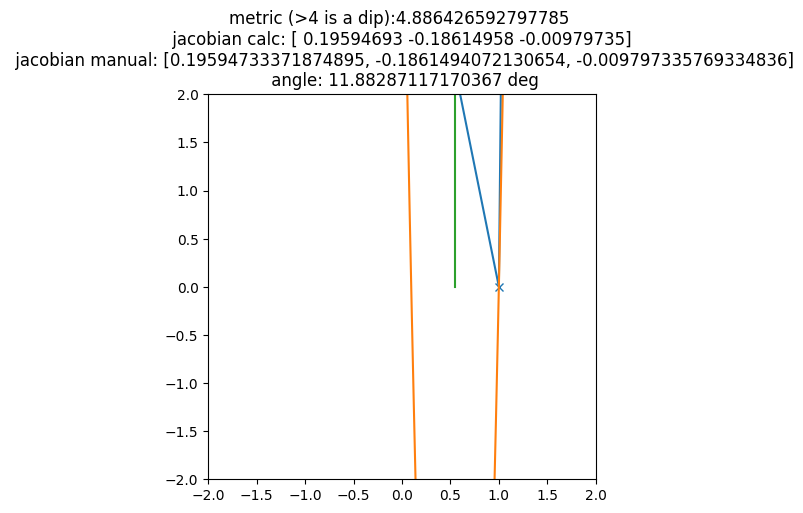

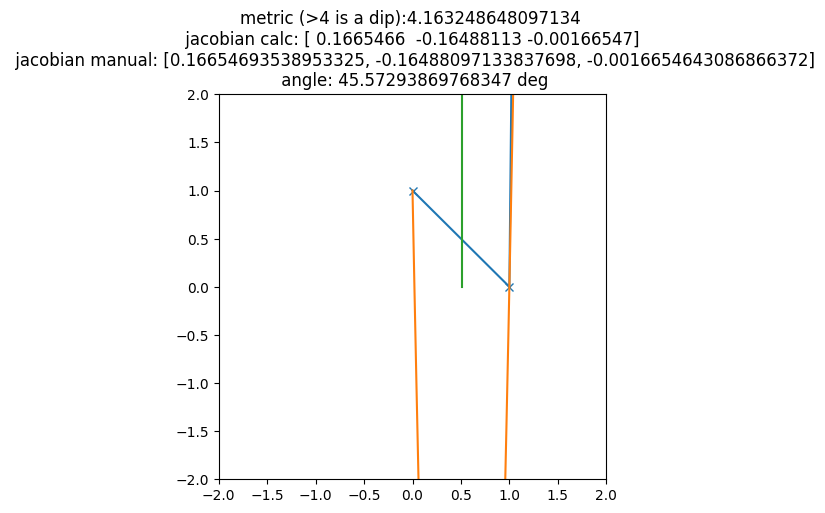

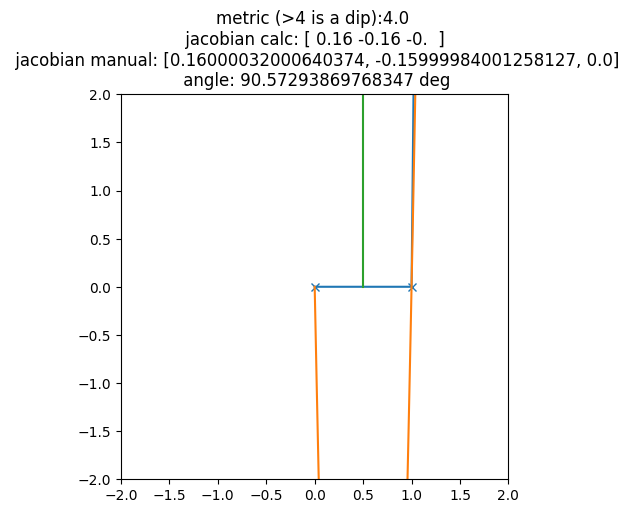

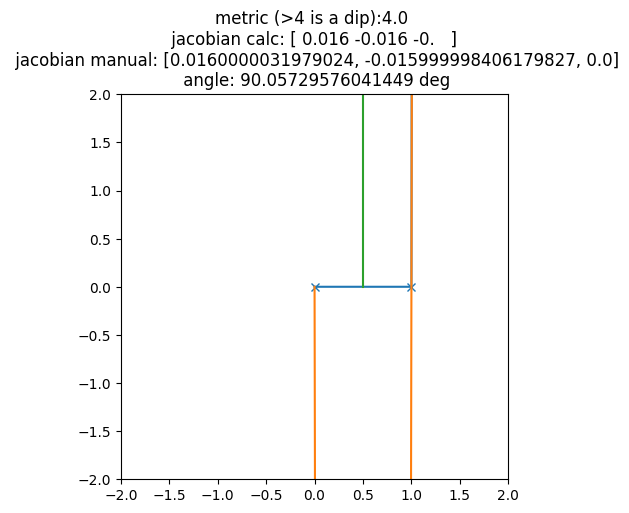

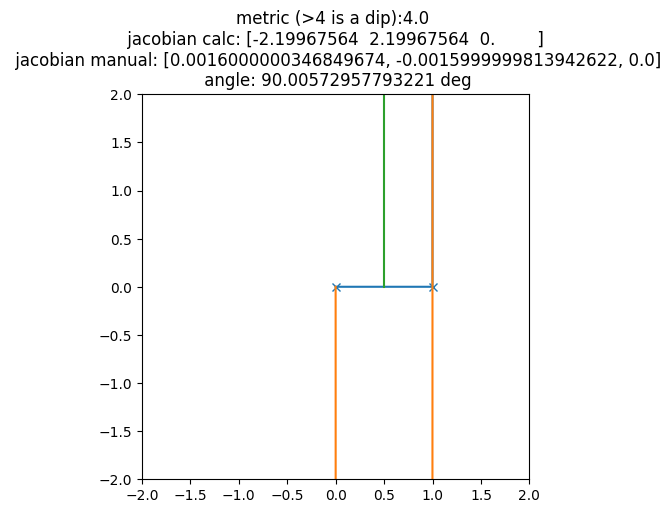

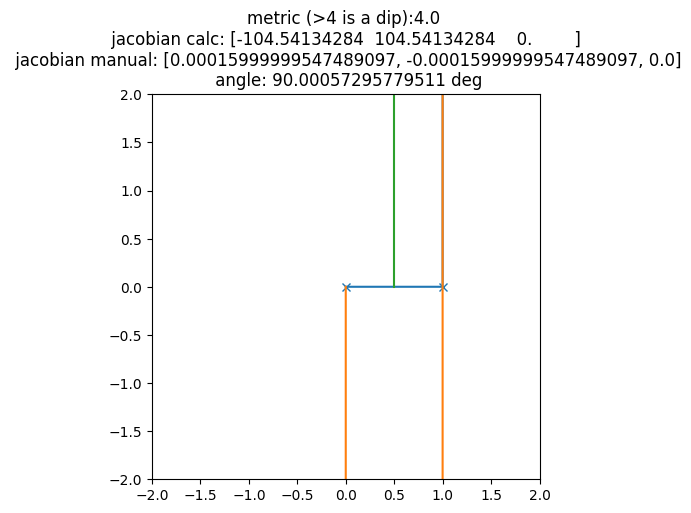

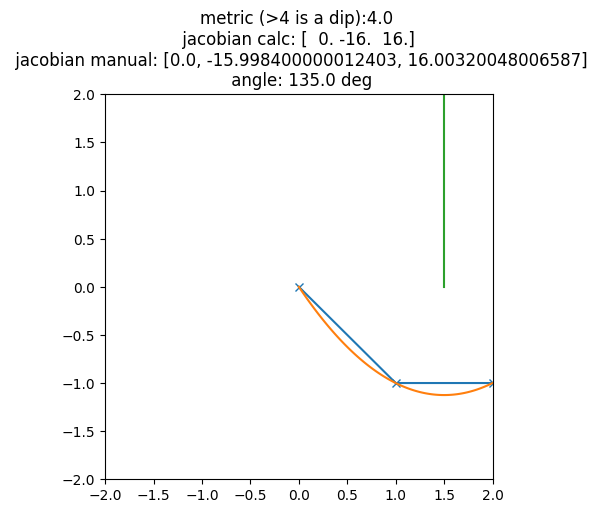

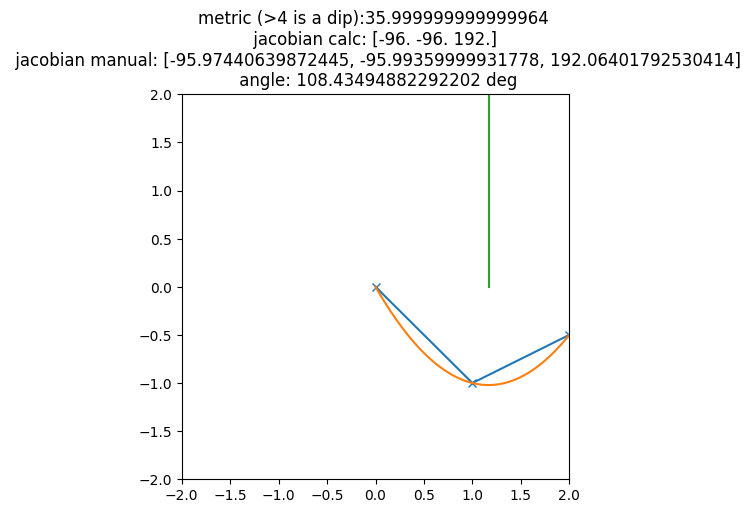

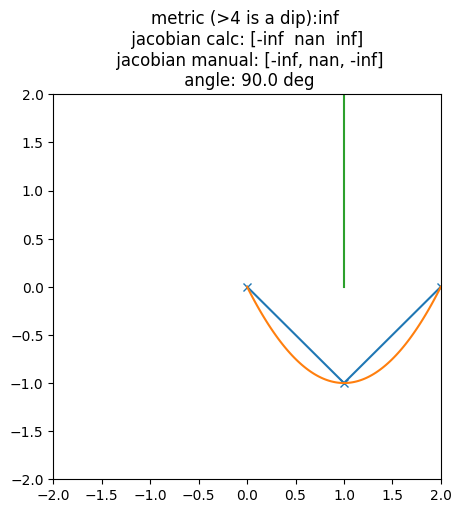

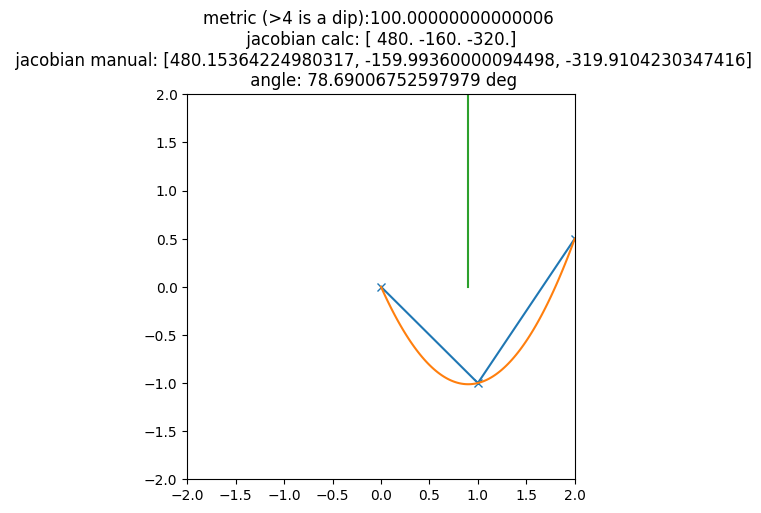

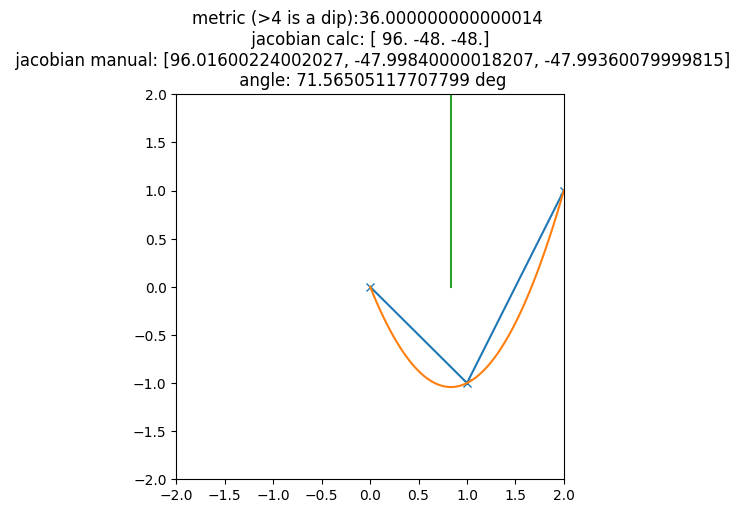

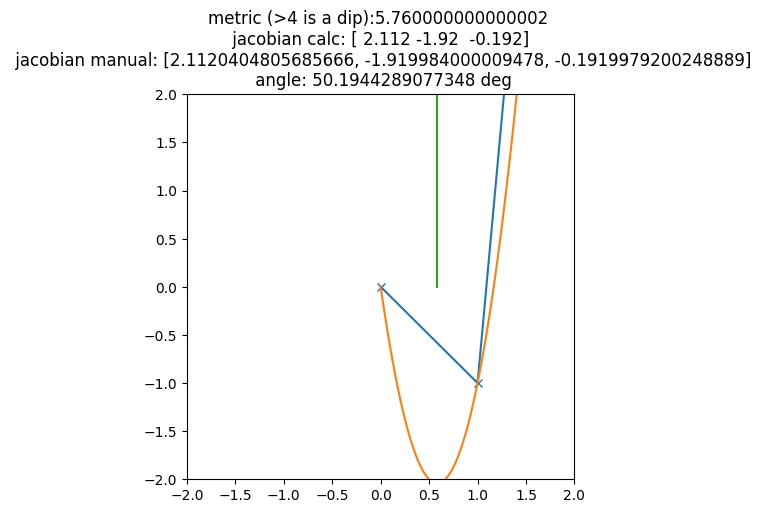

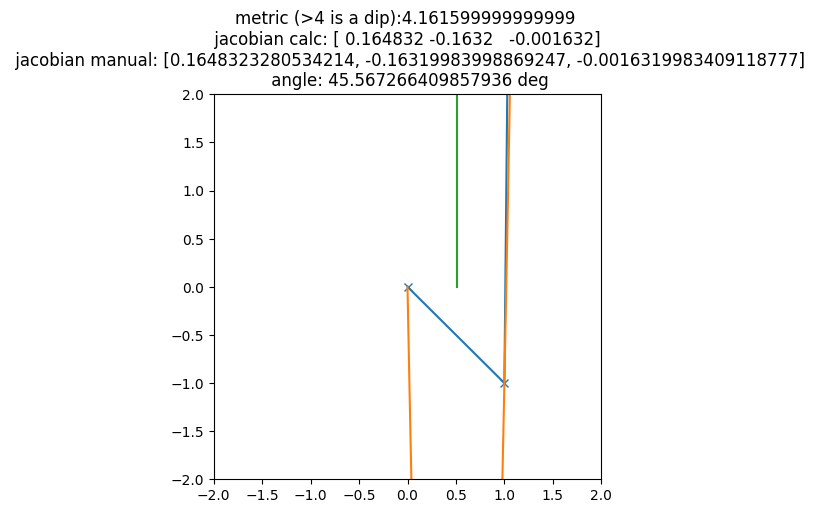

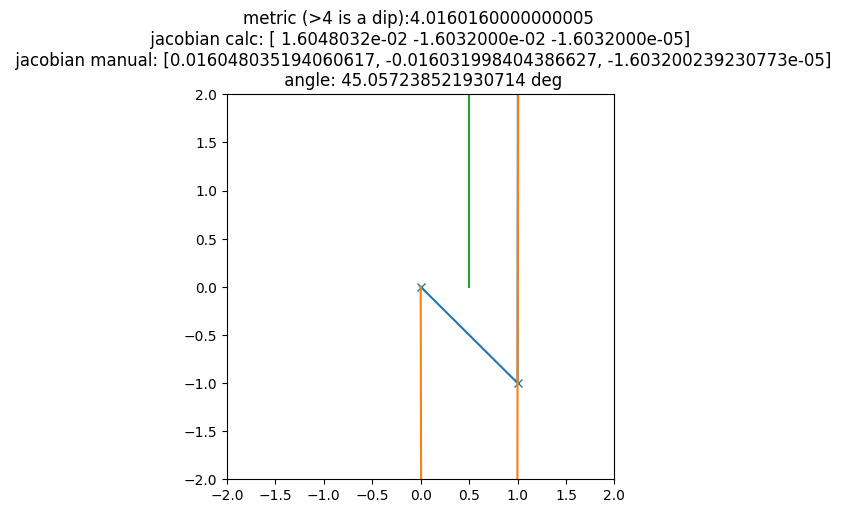

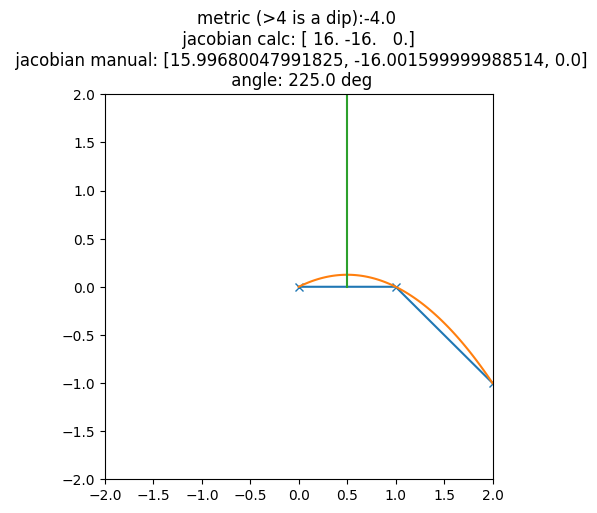

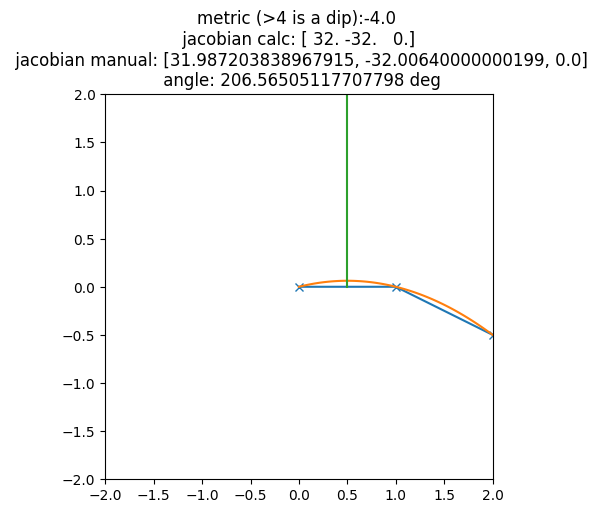

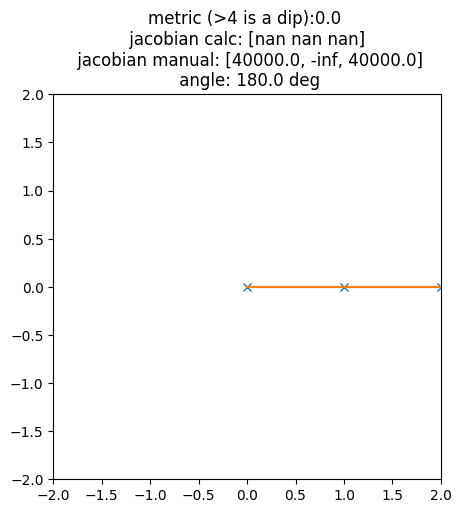

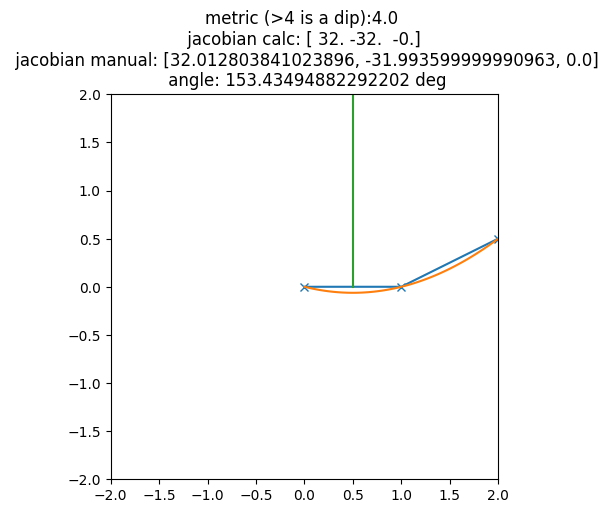

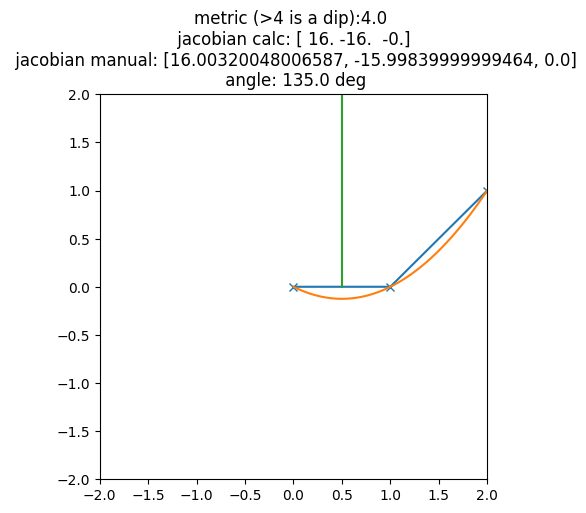

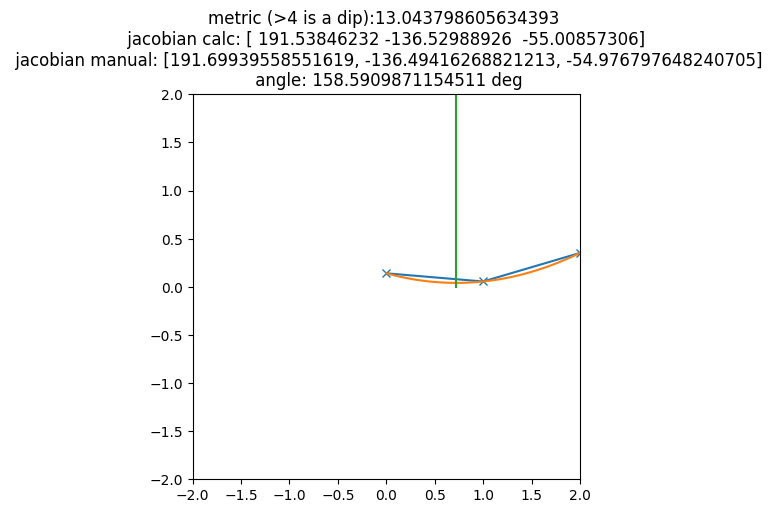

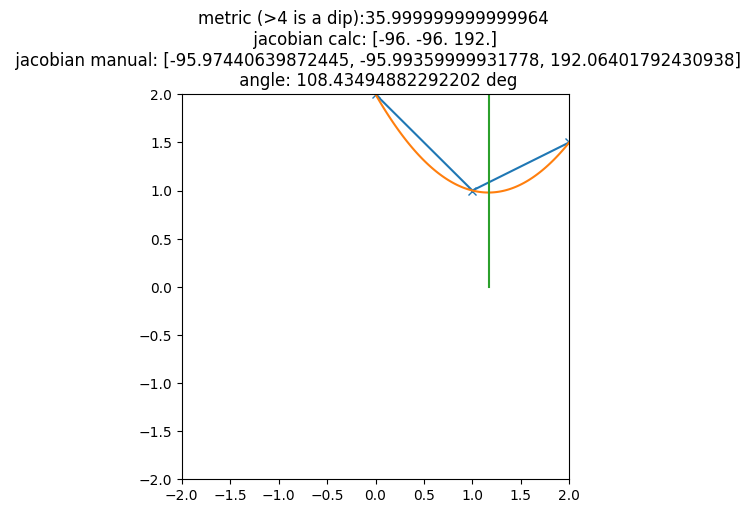

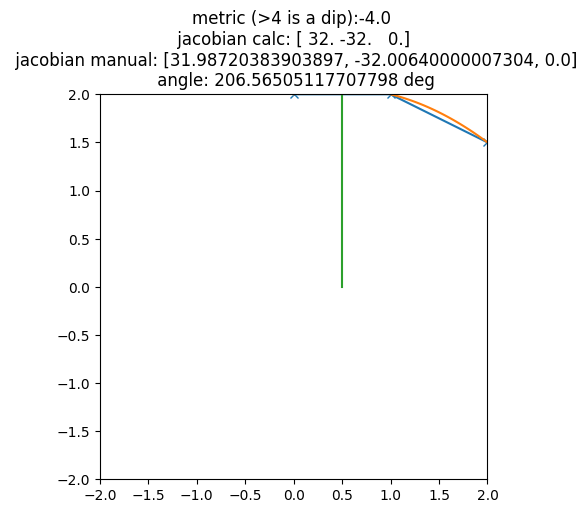

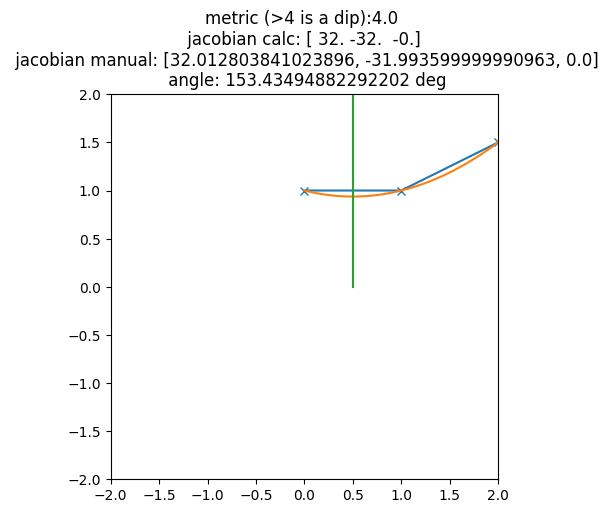

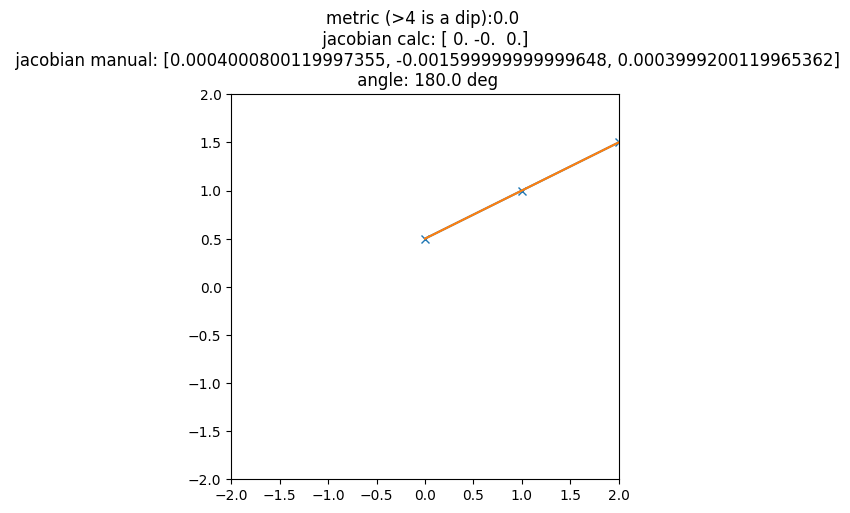

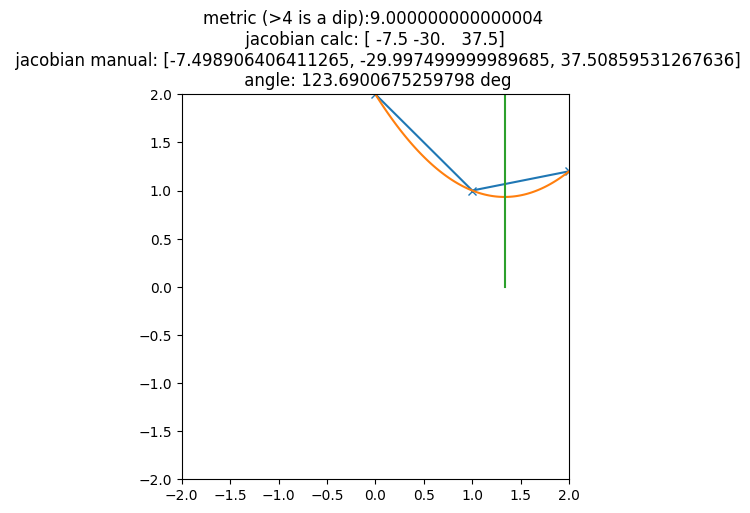

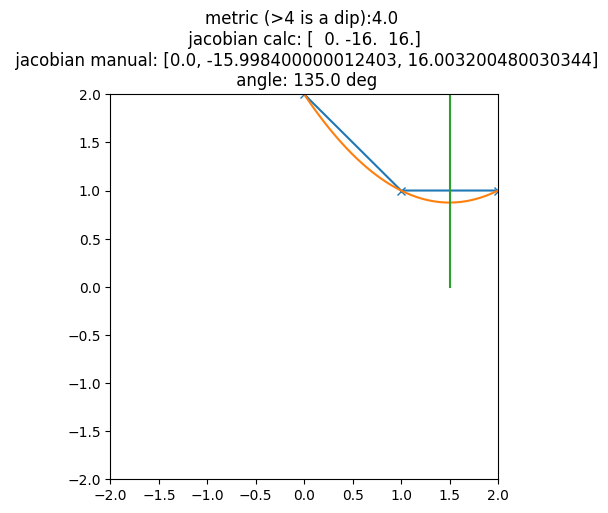

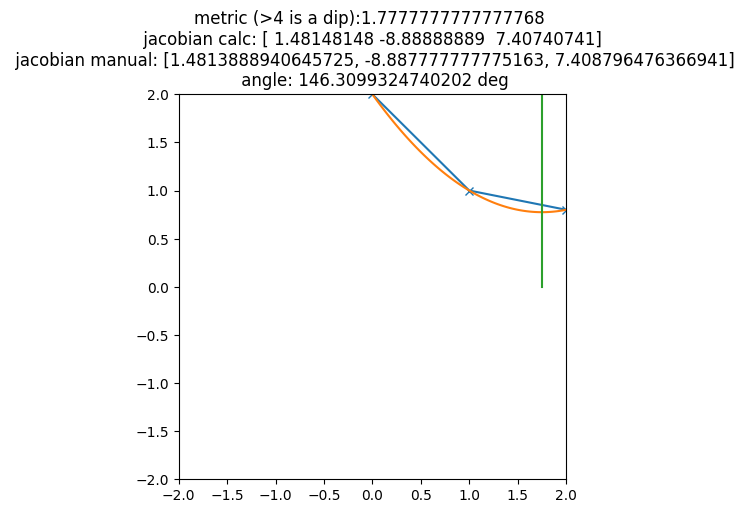

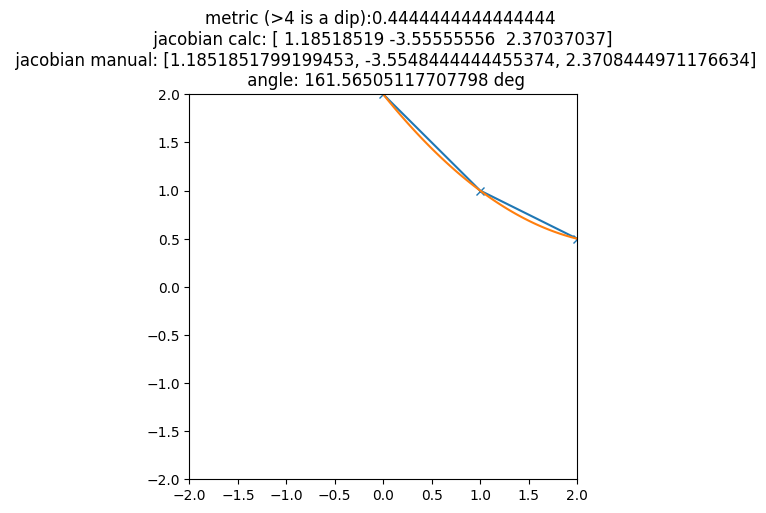

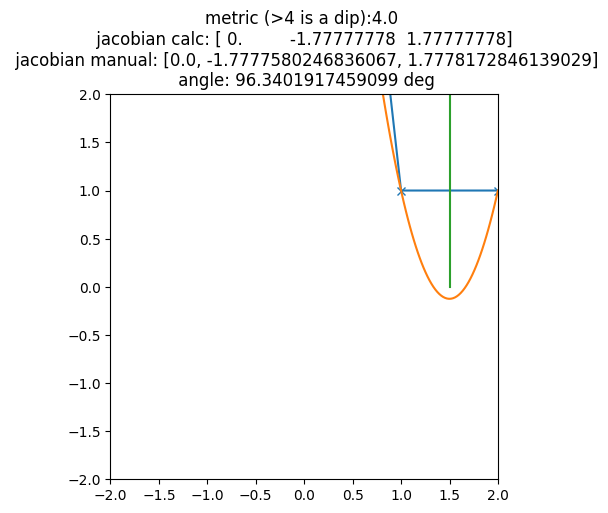

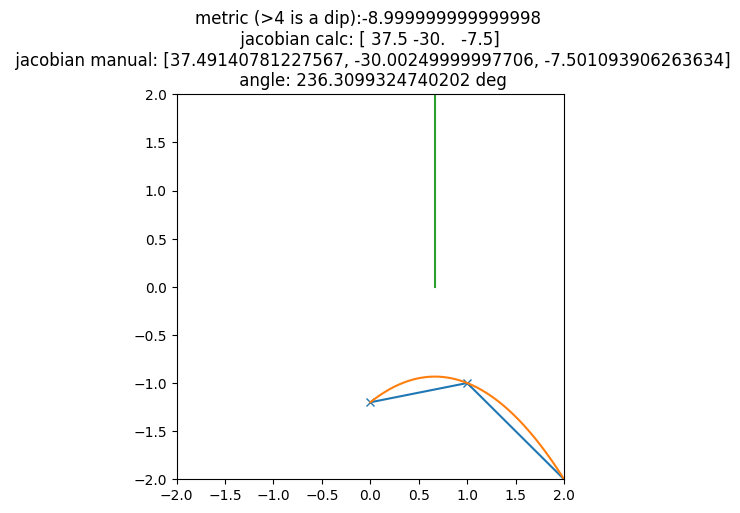

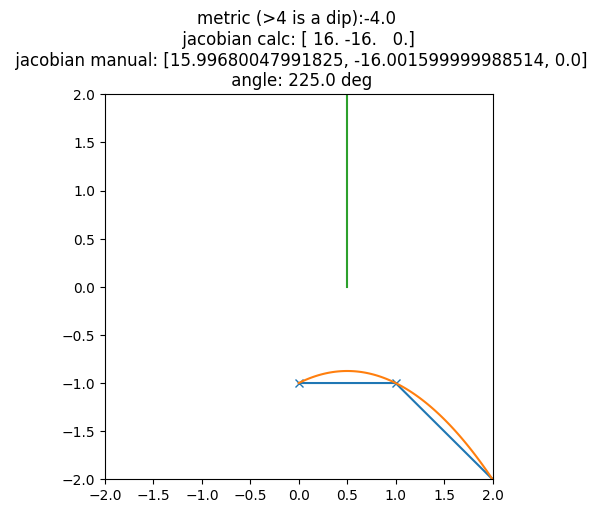

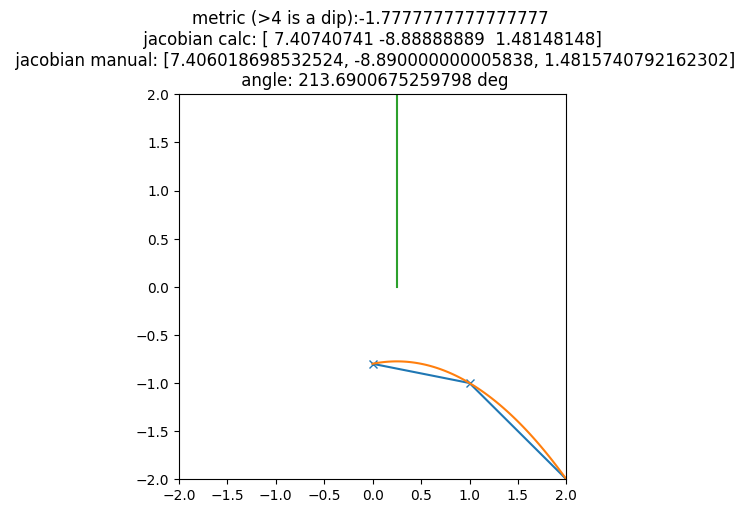

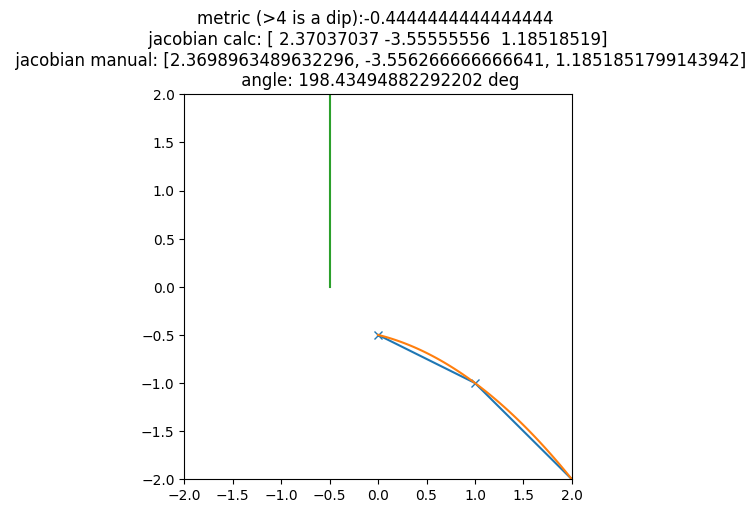

In [107]:

# attempt quadratic dip determination

ys = [
    np.array([5,0,100]),
      np.array([1,0,100]),
      np.array([0,0,100]),
    np.array([0,0,1000]),
    np.array([0,0,10000]),
    np.array([0,0,100000]),
    np.array([0,-1,-1]),
      np.array([0,-1,-0.5]),
      np.array([0,-1,-0]),
      np.array([0,-1,0.5]),
      np.array([0,-1,1.0]),
      np.array([0,-1,10.0]),
      np.array([0,-1,100.0]),
      np.array([0,-1,1000.0]),
      np.array([0,0,-1]),
      np.array([0,0,-0.5]),
      np.array([0,0,-0]),
      np.array([0,0,0.5]),
      np.array([0,0,1.0]),

    np.array([0.14015711859604432, 0.05489287714760028 ,0.3517808128059756]),
    np.array([2,1,1.5]),
      np.array([2,2,1.5]),
      np.array([1,1,1.5]),
      np.array([0.5,1,1.5]),
      np.array([2,1,1.2]),
      np.array([2,1,1]),
      np.array([2,1,0.8]),
      np.array([2,1,0.5]),
      np.array([10,1,1]),
      np.array([2,1,1.2])[::-1]*-1,
      np.array([2,1,1])[::-1]*-1,
      np.array([2,1,0.8])[::-1]*-1,
      np.array([2,1,0.5])[::-1]*-1,

      ]

class QuadraticFit:
    critical_dip_value = 1*np.exp(-1*np.abs(0.5))
    def __init__(self, y1, y2, y3):
        self.y1 = y1
        self.y2= y2
        self.y3 = y3
        P1,P2,P3 = self.y1,self.y2,self.y3
        # calculate quadratic that goes through these points
        self.a = P1
        self.c = 0.5*(P3+P1-2*P2)
        self.b = P2-P1-self.c

        self.quad_pos_fn = lambda x_: self.a + self.b*x_ + self.c*x_**2
        if self.c !=0:
            self.x_min = -self.b/(2*self.c)
        else:
            self.x_min = np.inf
        # precalculate jacobian components
        self.denom = (self.y1-self.y3)**3
        self.factor = 2*self.y1-4*self.y2+ 2* self.y3
    def calc_value(self,x):
        return self.quad_pos_fn(x)
    def calc_dip_metric2(self):
        if self.c !=0:
            return np.sign(self.c)*1./(-self.b/2/self.c - 1)**2
        else:
            return 0.
    def calc_dip_metric2_jacobian(self):

        jac = np.sign(self.c)*self.factor/self.denom*np.array([
            8*(self.y2 - self.y3),
            8*(-self.y1 + self.y3),
            8*(self.y1 - self.y2),
        ])
        return jac
    def calc_dip_metric(self):
        if self.c !=0:
            return np.sign(self.c)*np.exp(-1*np.abs(-self.b/2/self.c-1))
        else:
            return 0.
    def calc_dip_metric_jacobian(self):
        val = self.calc_dip_metric()
        jac = -1*np.sign(self.x_min-1)*np.sign(self.c)/self.factor**2*np.exp(-1*np.abs(-self.b/2/self.c-1))*np.array([
            -4*(self.y2 - self.y3),
            -4*(-self.y1 + self.y3),
            -4*(self.y1 - self.y2),
        ])
        return jac


for y in ys:
    quad_fit = QuadraticFit(y[0],y[1],y[2])
    x = np.array([0,1,2])

    angle = 180 - np.arctan(y[2]-y[1])/np.pi*180 - np.arctan(y[0]-y[1])/np.pi*180
    # P1,P2,P3 = y
    # # calculate quadratic that goes through these points
    # a = P1
    # c = 0.5*(P3+P1-2*P2)#(-b__ + np.sqrt(b__**2-4*a__*c__))/(2*a__)
    # b = P2-P1-c
    x_std = np.linspace(0,2,100)
    # quad_pos = lambda x_: a + b*x_ + c*x_**2
    quad_pos = lambda x: quad_fit.calc_value(x)
    fig,ax = plt.subplots(figsize=(5,5))
    plt.plot(x,y, marker ='x')
    plt.plot(x_std,quad_pos(x_std))

    x_min = quad_fit.x_min #-b/(2*c)
    plt.plot([x_min, x_min],[0,2])
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    delta=0.0001
    jac_manual_1 = (-quad_fit.calc_dip_metric2() +
                    QuadraticFit(y[0]+delta,y[1],y[2]).calc_dip_metric2())/delta
    jac_manual_2 = (-quad_fit.calc_dip_metric2() +
                    QuadraticFit(y[0],y[1]+delta,y[2]).calc_dip_metric2())/delta
    jac_manual_3 = (-quad_fit.calc_dip_metric2() +
                    QuadraticFit(y[0],y[1],y[2]+delta).calc_dip_metric2())/delta
    jac_manual = [jac_manual_1,jac_manual_2,jac_manual_3]
    plt.title('metric (>{} is a dip):{} \n jacobian calc: '
              '{} \n jacobian manual: {}\n angle: {} deg'.format(
        4,
                    quad_fit.calc_dip_metric2(),
    quad_fit.calc_dip_metric2_jacobian(),
    jac_manual,
    angle))#-b/2/c-1)**2))
    #%%



C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:83: RuntimeWarning: invalid value encountered in double_scalars
  jac = -1*np.sign(self.x_min-1)*np.sign(self.c)/self.factor**2*np.exp(-1*np.abs(-self.b/2/self.c-1))*np.array([
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\42086738.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=(5,5))
C:\Users\Chris\AppData\Local\Temp\ipykernel_14324\1285044005.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  jac = -1*np.sign(self.x_min-1)*np.sign(self.c)/self.factor**2*np.exp(-1*np.abs(-self.b/2/self.c-1))*np.array([


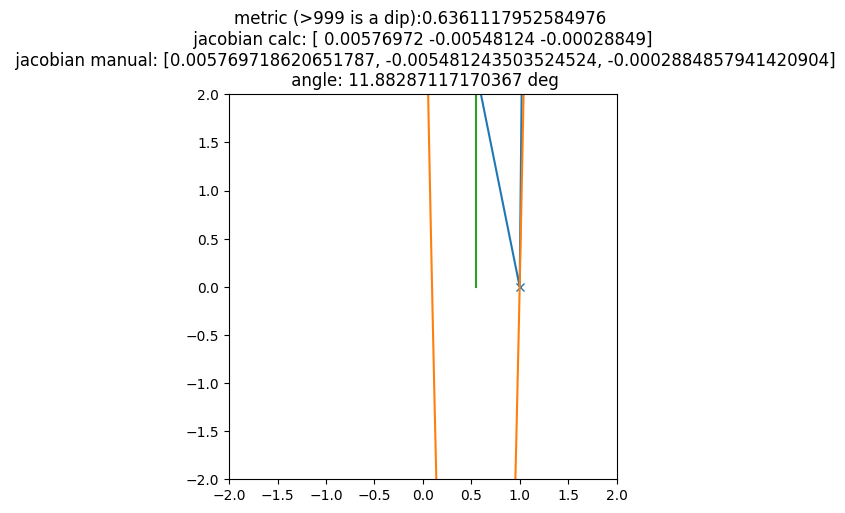

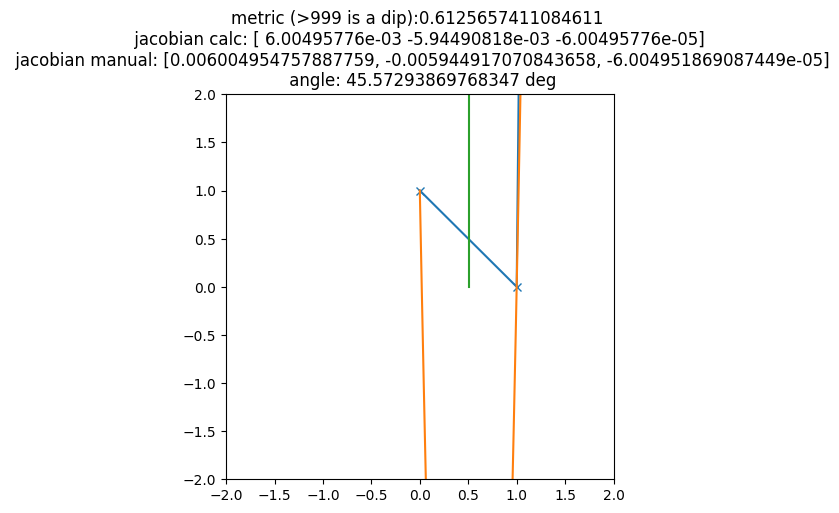

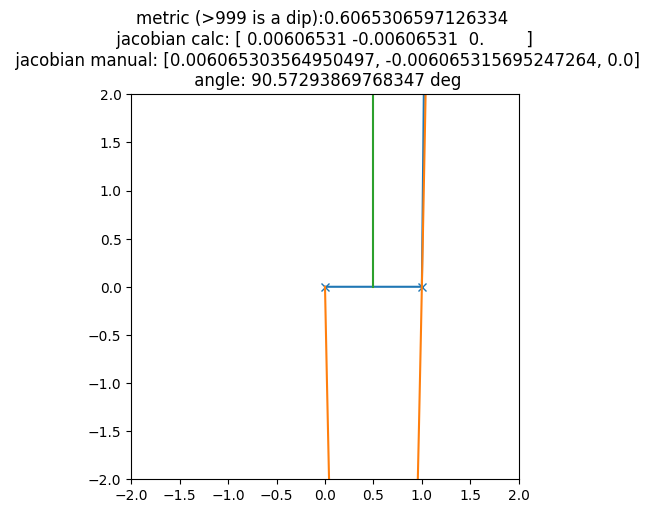

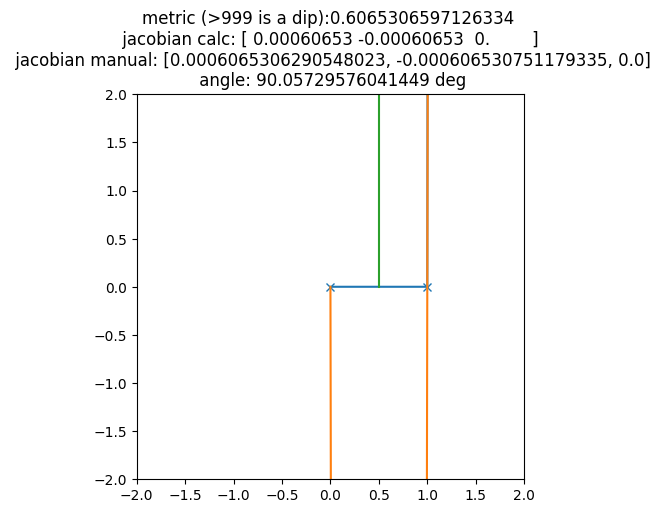

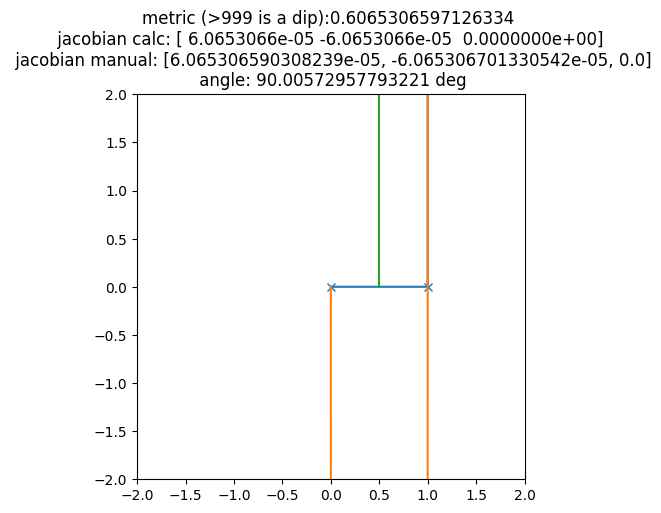

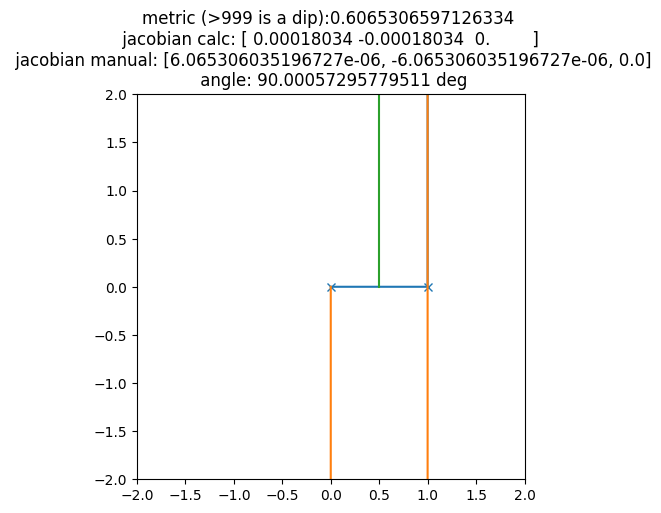

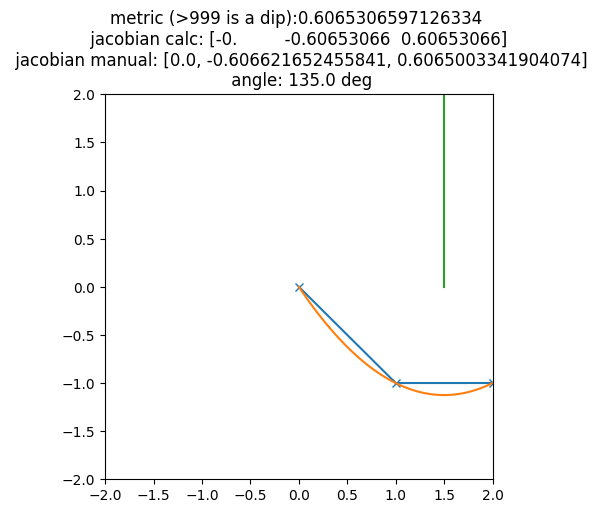

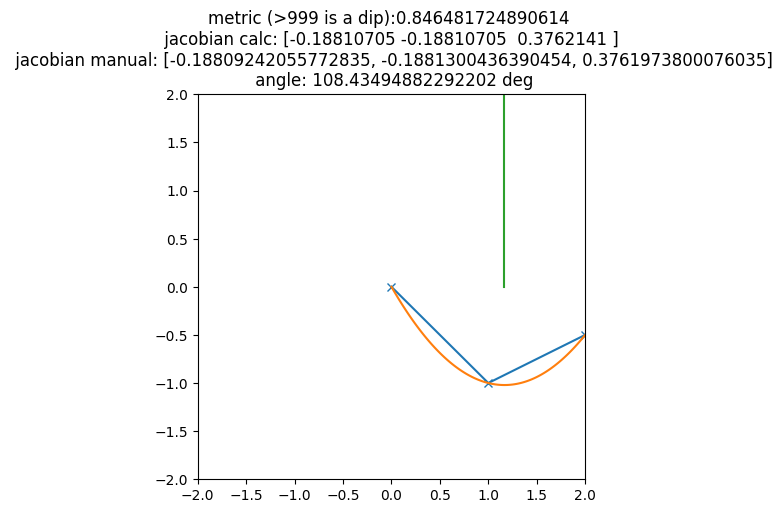

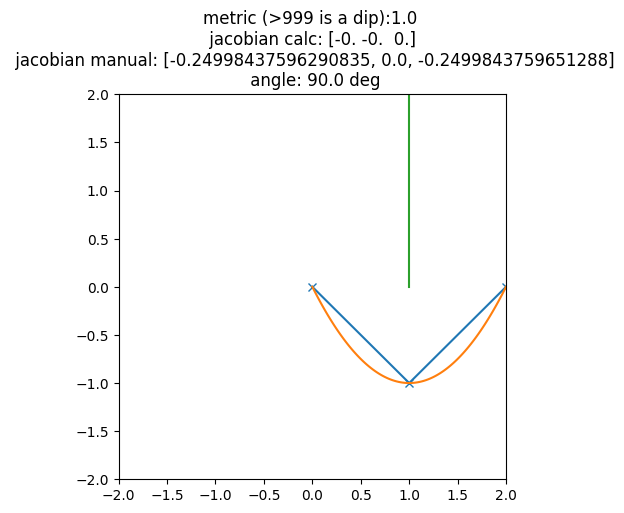

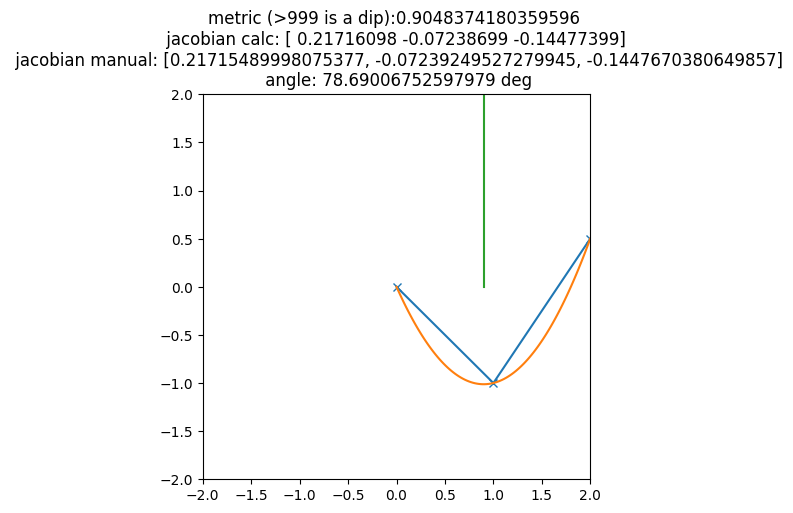

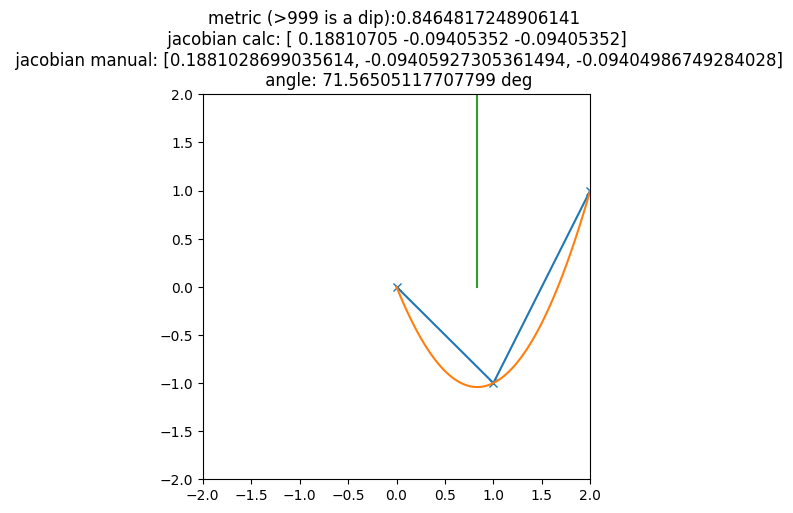

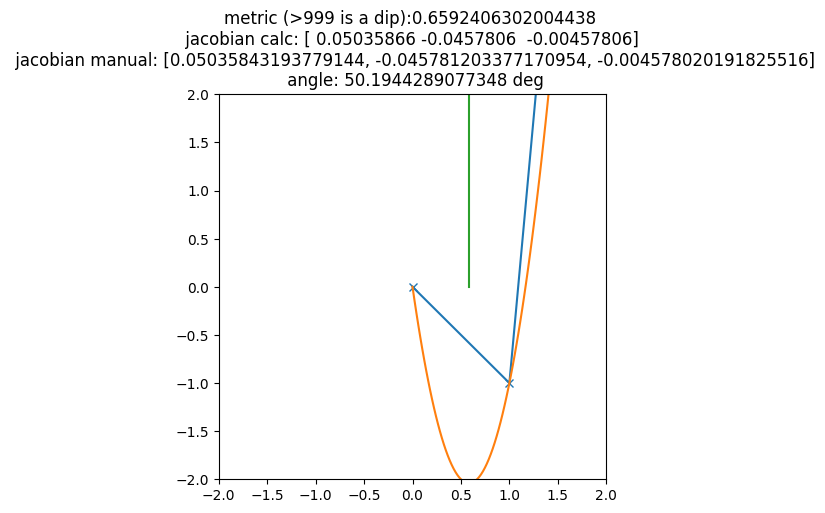

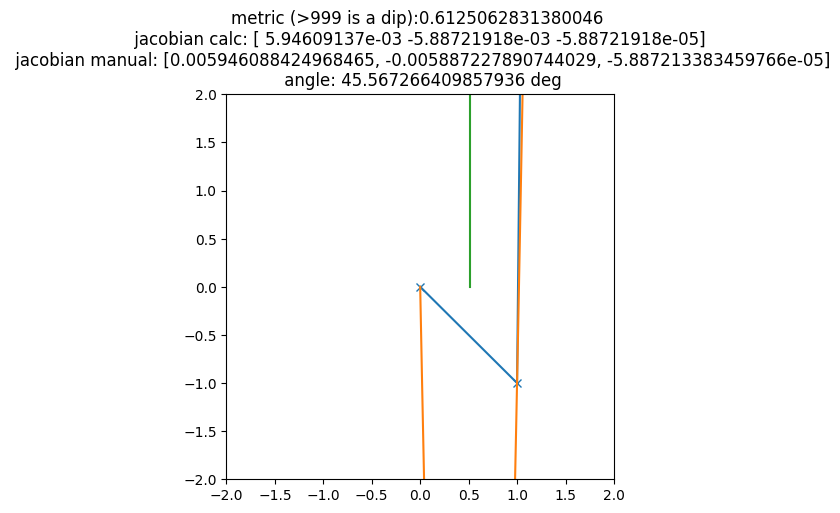

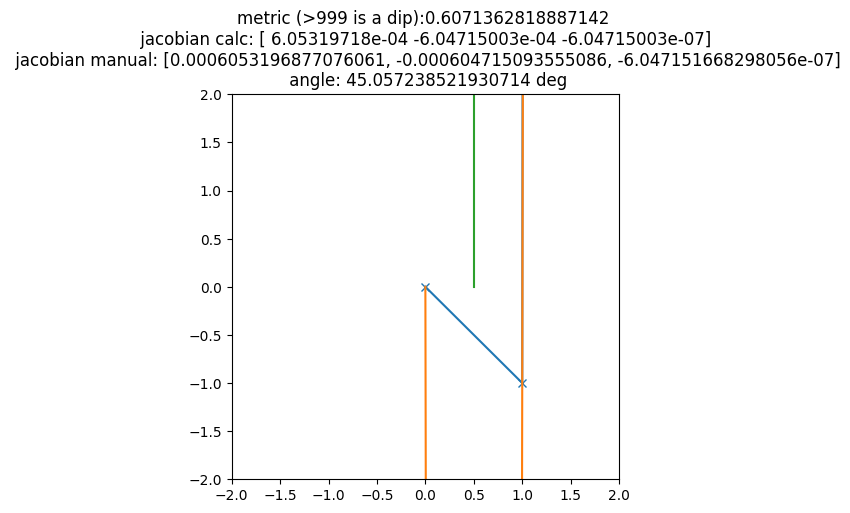

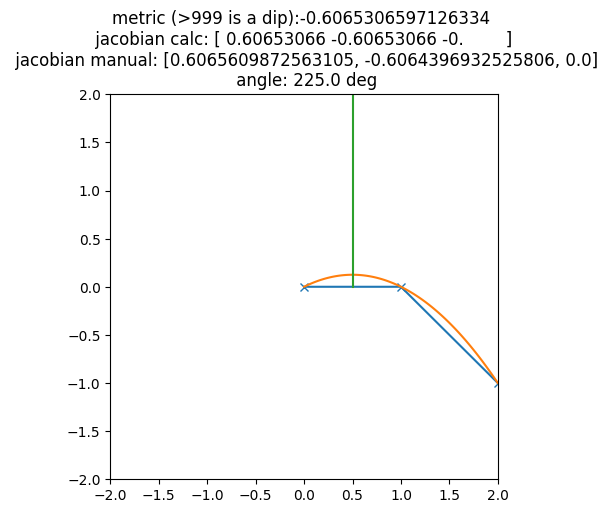

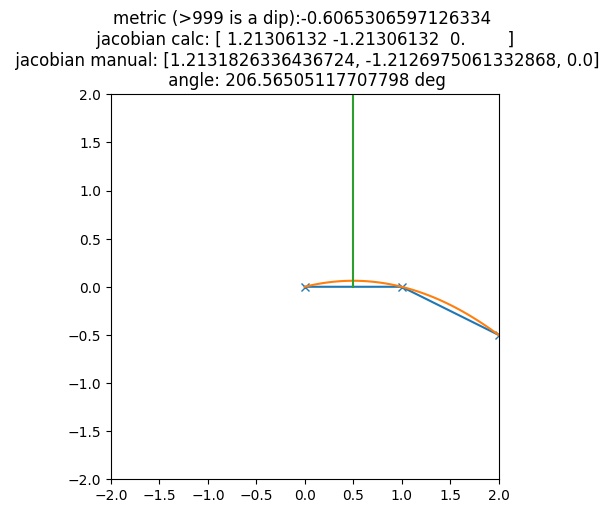

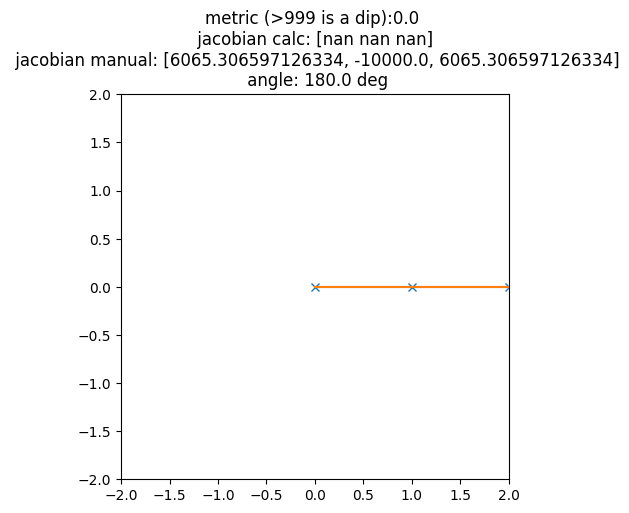

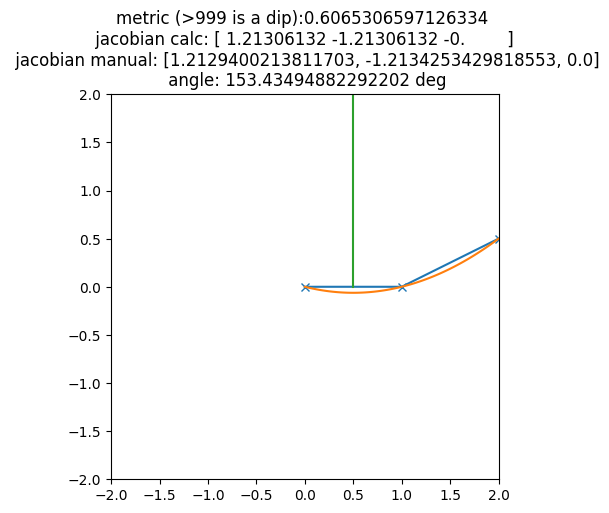

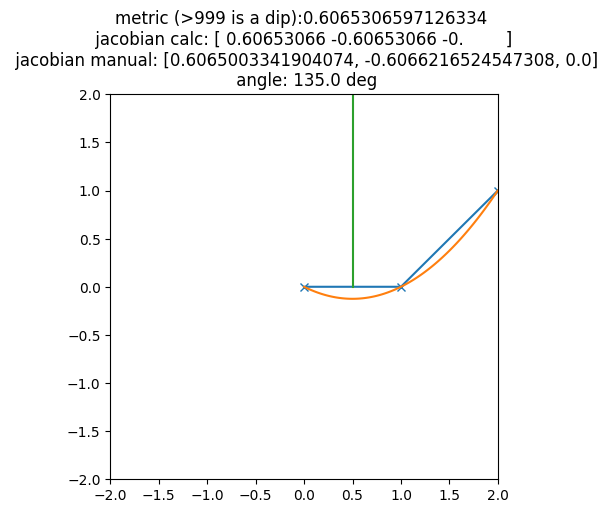

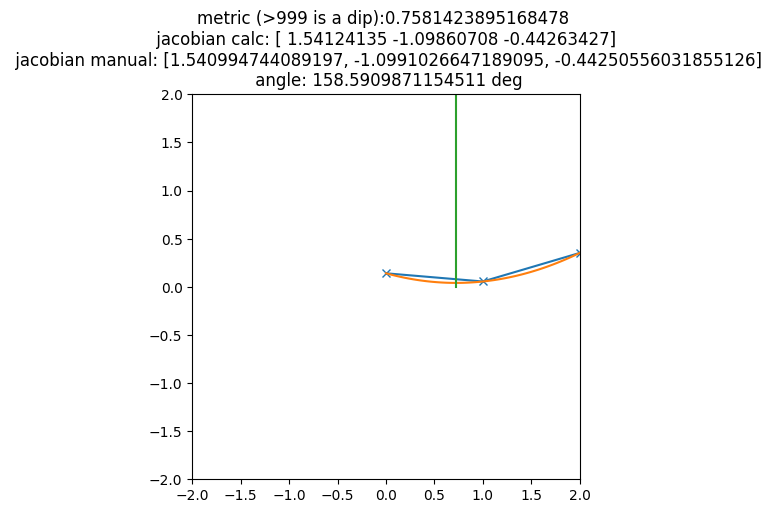

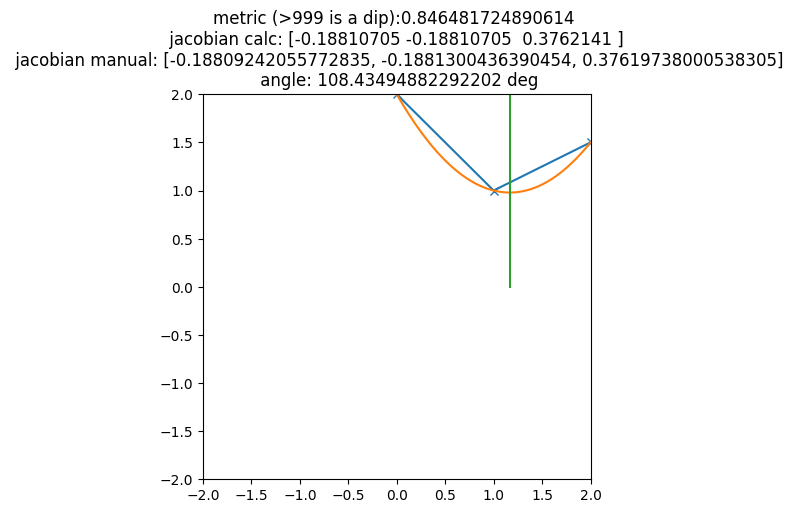

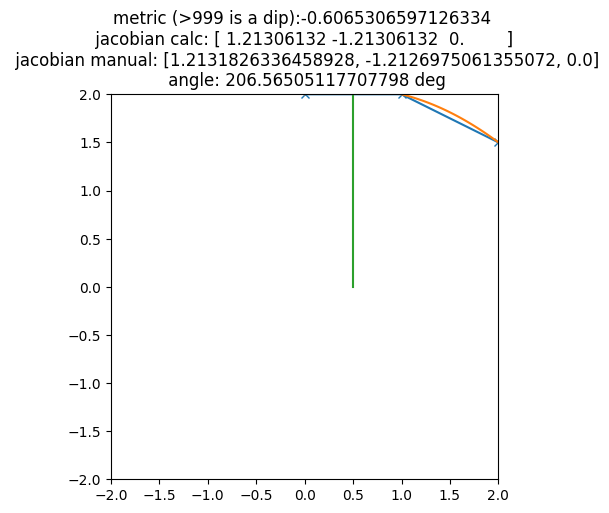

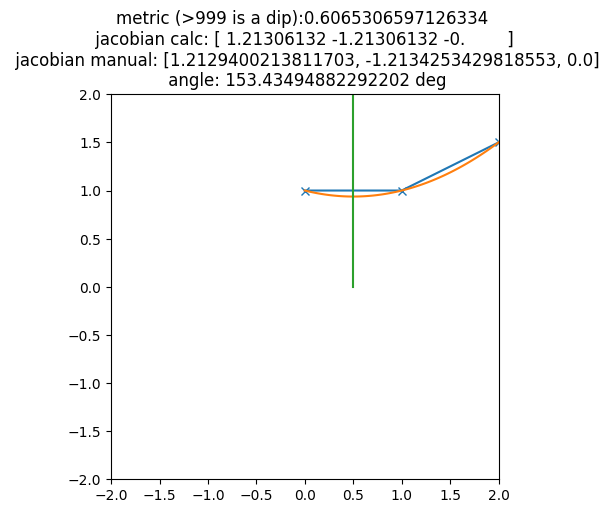

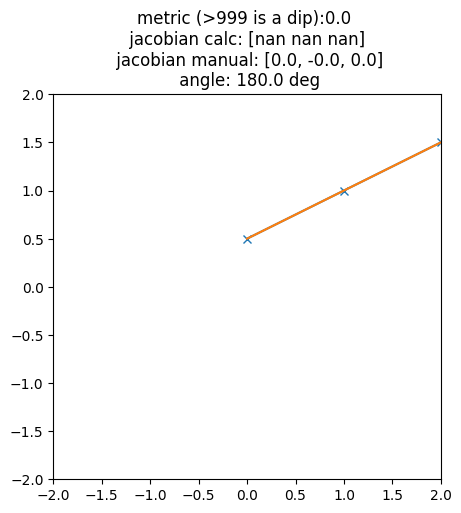

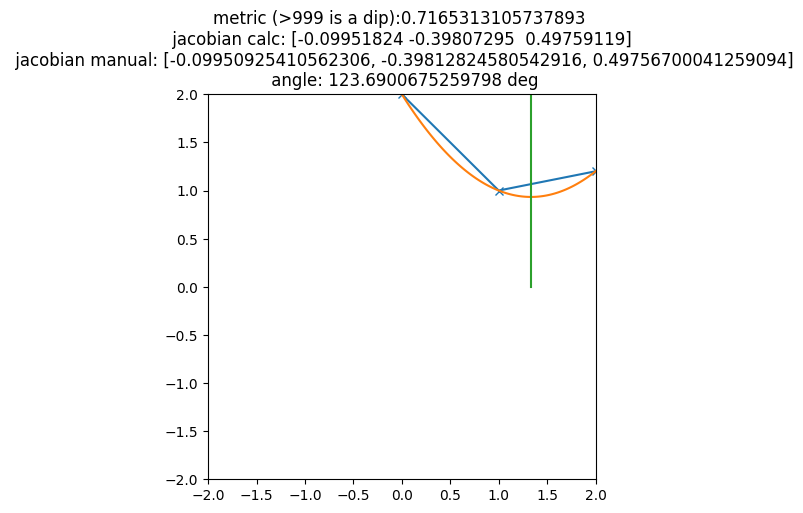

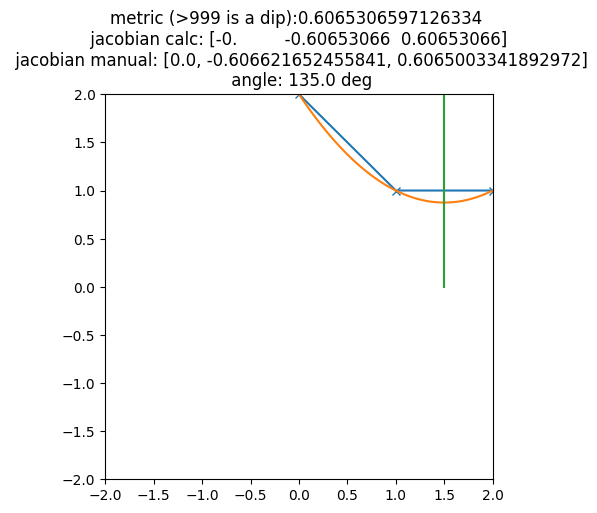

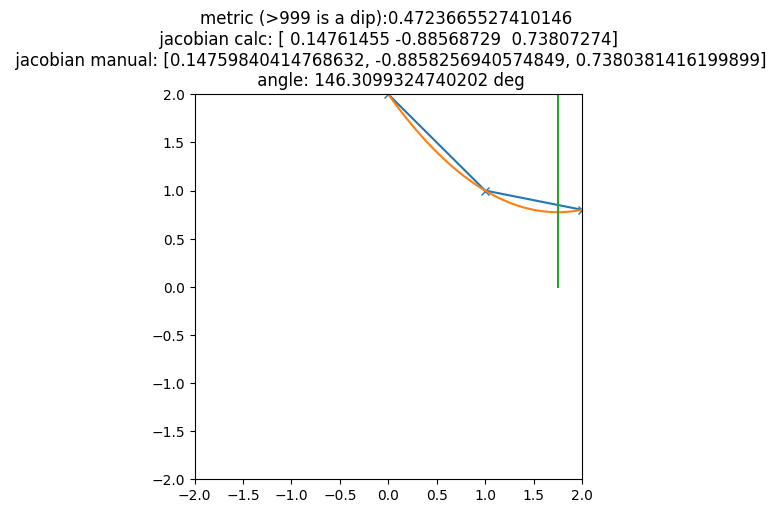

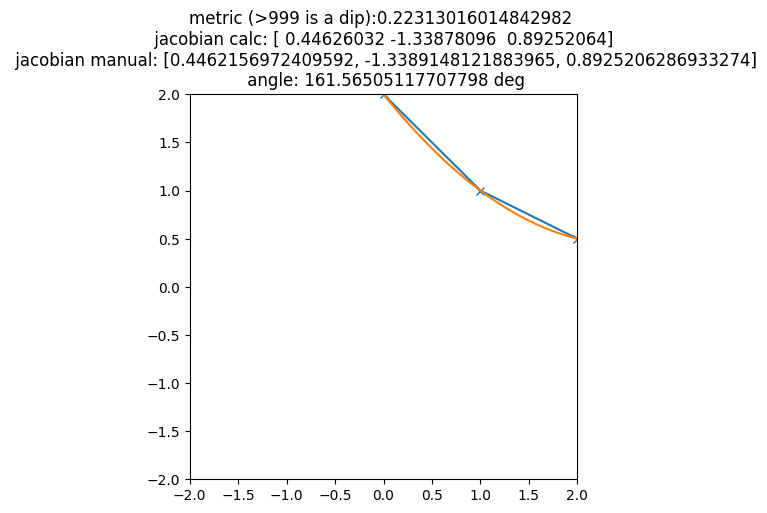

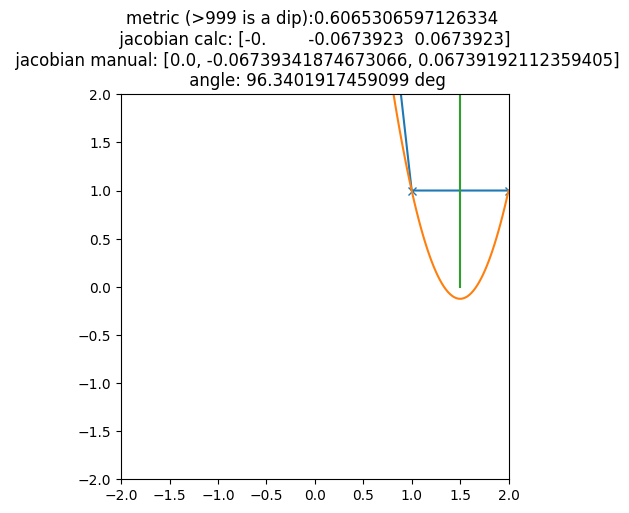

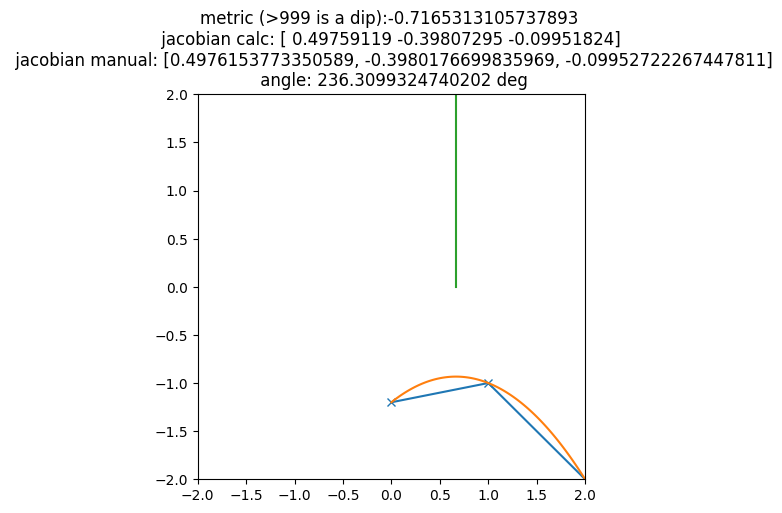

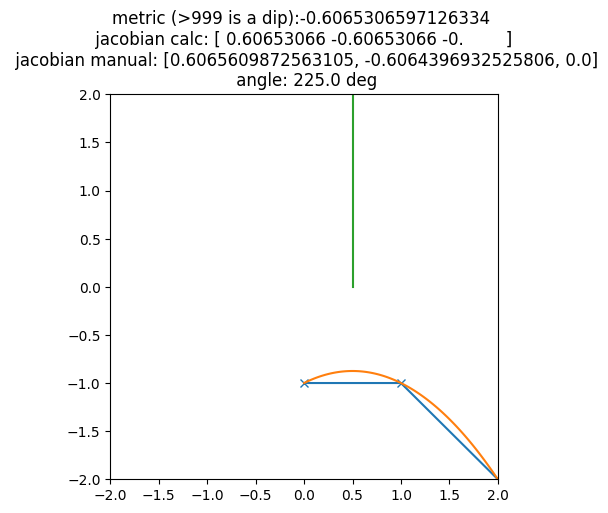

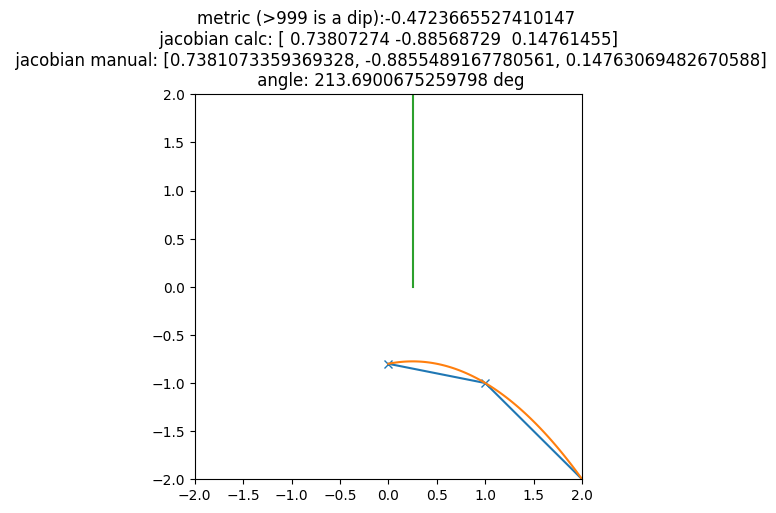

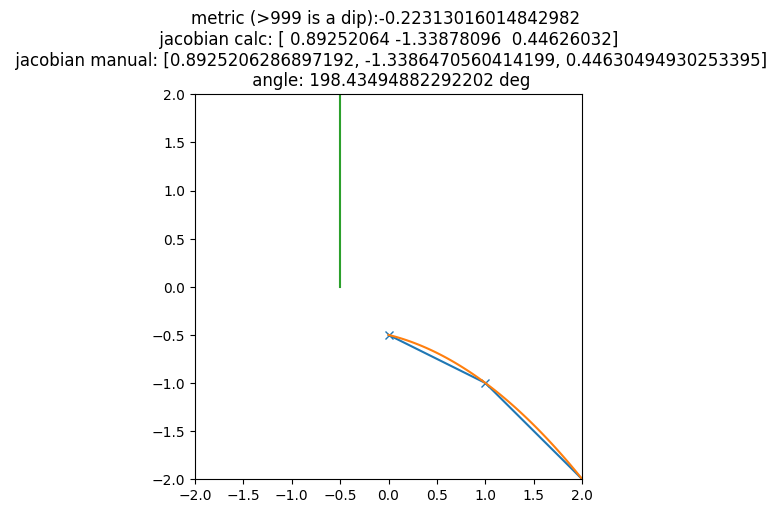

In [108]:
for y in ys:
    quad_fit = QuadraticFit(y[0],y[1],y[2])
    x = np.array([0,1,2])

    angle = 180 - np.arctan(y[2]-y[1])/np.pi*180 - np.arctan(y[0]-y[1])/np.pi*180
    # P1,P2,P3 = y
    # # calculate quadratic that goes through these points
    # a = P1
    # c = 0.5*(P3+P1-2*P2)#(-b__ + np.sqrt(b__**2-4*a__*c__))/(2*a__)
    # b = P2-P1-c
    x_std = np.linspace(0,2,100)
    # quad_pos = lambda x_: a + b*x_ + c*x_**2
    quad_pos = lambda x: quad_fit.calc_value(x)
    fig,ax = plt.subplots(figsize=(5,5))
    plt.plot(x,y, marker ='x')
    plt.plot(x_std,quad_pos(x_std))

    x_min = quad_fit.x_min #-b/(2*c)
    plt.plot([x_min, x_min],[0,2])
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    delta=0.0001
    jac_manual_1 = (-quad_fit.calc_dip_metric() +
                    QuadraticFit(y[0]+delta,y[1],y[2]).calc_dip_metric())/delta
    jac_manual_2 = (-quad_fit.calc_dip_metric() +
                    QuadraticFit(y[0],y[1]+delta,y[2]).calc_dip_metric())/delta
    jac_manual_3 = (-quad_fit.calc_dip_metric() +
                    QuadraticFit(y[0],y[1],y[2]+delta).calc_dip_metric())/delta
    jac_manual = [jac_manual_1,jac_manual_2,jac_manual_3]
    plt.title('metric (>{} is a dip):{} \n jacobian calc: '
              '{} \n jacobian manual: {}\n angle: {} deg'.format(
        999,#crit_value,
                    quad_fit.calc_dip_metric(),
    quad_fit.calc_dip_metric_jacobian(),
    jac_manual,
    angle))#-b/2/c-1)**2))
    #%%

In [109]:
def get_dip_values(values, return_what = 'values'):
    if return_what == 'values':
        metrics = []
    else:
        metrics = np.zeros([300,len(values)])
    n_ = len(values)
    i_row = 0
    for i_start in range(n_-2):
        for i_end in range(i_start+2, n_):
            for i_mid in range(i_start+1, i_end):
                # print(i_start, i_end, i_mid)
                if return_what == 'values':
                    metrics.append(QuadraticFit(values[i_start],
                                         values[i_mid],
                                         values[i_end]).calc_dip_metric())
                else: # return jacobian
                    jac_local = QuadraticFit(values[i_start],
                                         values[i_mid],
                                         values[i_end]).calc_dip_metric_jacobian()
                    metrics[i_row,i_start] =jac_local[0]
                    metrics[i_row,i_mid] =jac_local[1]
                    metrics[i_row,i_end] =jac_local[2]

                    i_row =i_row +1
    if return_what !='values':
        metrics = metrics[:i_row]
    return np.array(metrics)

print(get_dip_values([1,2,3.2,2,3.1]))
print(get_dip_values([1,2,3.2,2,3.1], return_what='jacobian'))

[ 4.08677144e-03 -6.06530660e-01 -8.63243197e-01  2.75364493e-05
 -6.33483238e-01  2.75364493e-05 -1.00000000e+00 -6.55028244e-01
  6.06530660e-01  9.78495461e-01]
[[ 0.12260314 -0.22477243  0.10216929  0.          0.        ]
 [ 0.         -0.60653066  0.          0.60653066  0.        ]
 [-0.08961002  0.         -0.07467502  0.16428504  0.        ]
 [ 0.00302901 -0.00578265  0.          0.          0.00275364]
 [-0.01197511  0.         -0.25147728  0.          0.26345239]
 [ 0.00302901  0.          0.         -0.00578265  0.00275364]
 [ 0.         -0.          0.          0.          0.        ]
 [ 0.         -0.03875907 -0.42634974  0.          0.46510881]
 [ 0.          0.55139151  0.         -0.55139151  0.        ]
 [ 0.          0.         -0.20346787 -0.01849708  0.22196494]]


[0.]
[0.]
[[-0. -0.  0.]]


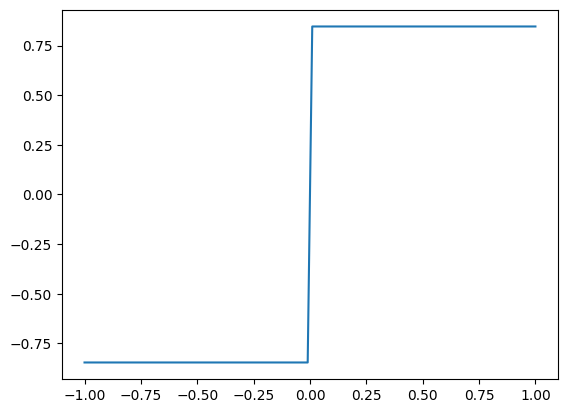

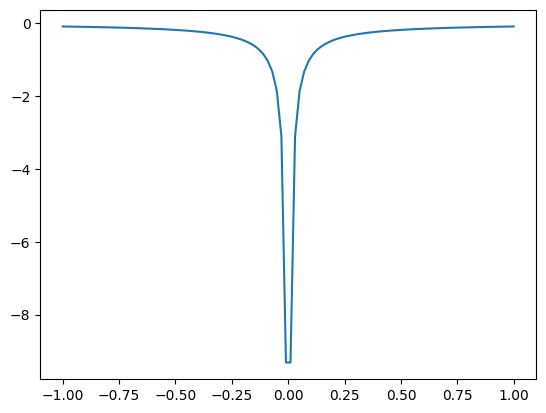

In [110]:
print(get_dip_values([1.,2.,3.001], return_what = 'values'))
print(get_dip_values([1.,2.,3.00], return_what = 'values'))

print(get_dip_values([1.,1.01,1], return_what = 'jacobian'))

vals = []
deriv = []
x_std = np.linspace(-1,1,100)
for i in x_std:
    # print(get_dip_values([i,-i,0]))
    vals.append(get_dip_values([i,-i,0])[0])
    deriv.append(get_dip_values([i,-i,0],return_what ='jacobian')[0,1])
# print(vals)
plt.plot(x_std,vals)

fig.ax = plt.subplots()
plt.plot(x_std,deriv)

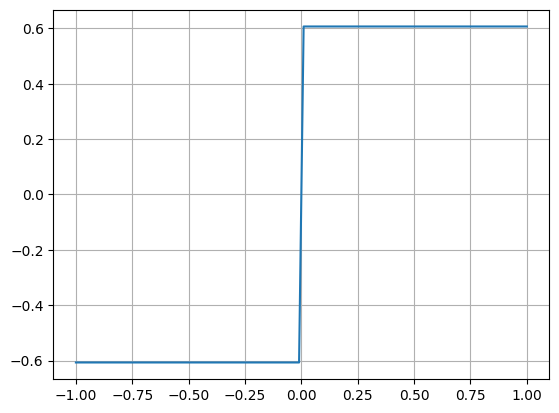

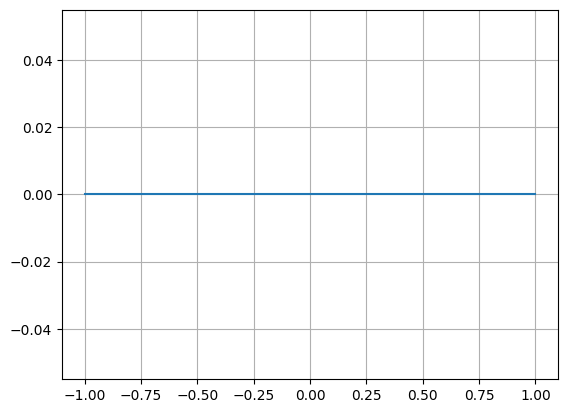

In [111]:
vals = []
deriv = []
x_std = np.linspace(-1,1,100)
for i in x_std:
    # print(get_dip_values([1,1*i,1]))
    vals.append(get_dip_values([0,0,i])[0])
    deriv.append(get_dip_values([0,0,i],return_what ='jacobian')[0,2])
# print(deriv)
plt.plot(x_std,vals)
plt.grid()

fig.ax = plt.subplots()
plt.plot(x_std,deriv)
plt.grid()

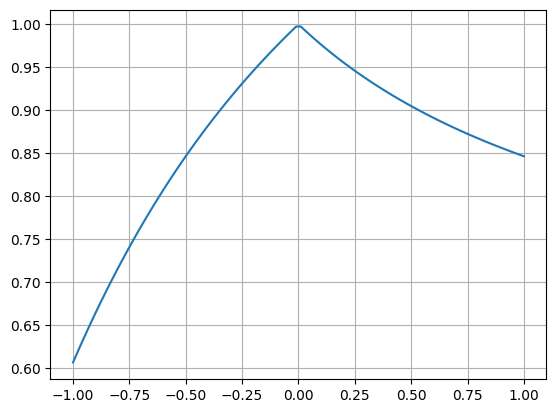

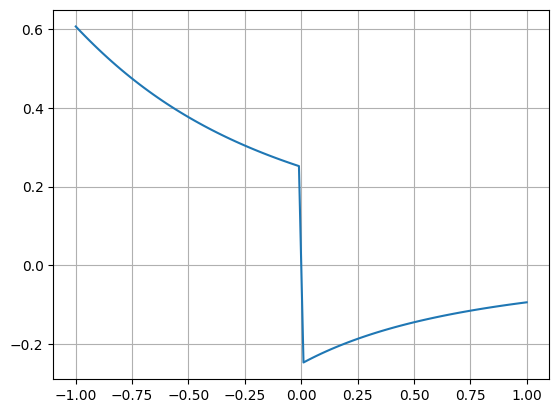

In [112]:
vals = []
deriv = []
x_std = np.linspace(-1,1,100)
for i in x_std:
    # print(get_dip_values([1,1*i,1]))
    vals.append(get_dip_values([0,-1,i])[0])
    deriv.append(get_dip_values([0,-1,i],return_what ='jacobian')[0,2])
# print(deriv)
# plt.plot(x_std,np.log(vals))
plt.plot(x_std,vals)
plt.grid()
# plt.ylim([0,20])
fig.ax = plt.subplots()
plt.plot(x_std,deriv)
plt.grid()
# plt.ylim([-200,200])

In [113]:
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint, LinearConstraint
class RidgeRegression():
    def __init__(self,
                    monotone_constraints=None, # either: None=0, -1 (all non-increasing), +1 (all non-decreasing), or a list of +1/-1/0 for all feats
                 positive=None, # included for sklearn Ridge compatibiltiy. positive=True is equivalent to monotone_constraints=1.
                 alpha = 0.01,
                 fit_intercept=True,
                 unimodal = False, # either: True/False, OR a list of lists of indices of features to be made unimodal
                 ):
        self.monotone_constraints = monotone_constraints
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.unimodal = unimodal
        self.positive = positive


    def fit(self, X, y, sample_weight=None):
        if not self.positive is None:
            if self.positive:
                self.monotone_constraints = 1
        # construct optimisation problem with requested percentiles
        coefs_init_incl_intercept = np.zeros(X.shape[1]+(1 if self.fit_intercept else 0))
        X_ = X.copy()
        coef_end_idx = X_.shape[1]

        if sample_weight is None:
            sample_weight = np.ones(len(y))
        # standardise sampleweight so that sum equals len(y)
        sample_weight = sample_weight  / (np.sum(sample_weight)/len(y))
        # Add intercept
        if self.fit_intercept:
            X_ = np.hstack([ X_,np.ones([X.shape[0],1])])

        def loss_fn(coefs):
            loss =  0.5*np.sum(sample_weight*(y-np.dot(X_,coefs))**2)+ 0.5*self.alpha*np.sum(coefs[:coef_end_idx]**2)
            return loss

        def loss_fn_with_jac(coefs):
            loss =  0.5*np.sum(sample_weight*(y-np.dot(X_,coefs))**2)+ 0.5*self.alpha*np.sum(coefs[:coef_end_idx]**2)
            y_resid = np.dot(X_,coefs)-y
            jac = np.dot(X_.T, sample_weight*y_resid).ravel() +self.alpha*np.hstack([ coefs[:coef_end_idx],[0]])
            return loss,jac

        def loss_fn_with_jac_ls_coefs(coefs, reference_coefs):

            loss__ =  0.5*np.sum((coefs[:-1]-reference_coefs[:-1])**2)
            y_resid = coefs[:-1]-reference_coefs[:-1]
            jac = np.hstack([y_resid,[0]])
            return loss__,jac

        jac = True
        # initial unconstrained solve: L-BFGS-B is VERY fast
        res = minimize(loss_fn, x0 = coefs_init_incl_intercept, method = 'L-BFGS-B',
                       # options = {'maxiter':100},
                       )
        # update initial guess to be unconstrained fit
        coefs_init_incl_intercept = res['x']
        coefs_init = coefs_init_incl_intercept[:coef_end_idx]
        constraints = []
        if not self.monotone_constraints is None:
            if not hasattr(self.monotone_constraints,  '__iter__'):
                mono_constr = [self.monotone_constraints]*X.shape[1]
            else:
                mono_constr = self.monotone_constraints
            if self.fit_intercept:
                    mono_constr.append(0)
            for i, mono_constr_ in enumerate(mono_constr):
                A = np.zeros(len(coefs_init_incl_intercept))
                A[i] = 1
                if mono_constr_ == 1:
                    constraints.append(LinearConstraint(A, lb=0., ub=np.inf, keep_feasible=False))
                elif mono_constr_ == -1:
                    constraints.append(LinearConstraint(A, lb=-np.inf, ub=0, keep_feasible=False))
                elif mono_constr_ == 0:
                    pass
                else:
                    raise ValueError('monotone_constraints must be 1, -1 or 0: {}'.format())


        if not self.unimodal is None:
            # add unimodal constraints
            if type(self.unimodal) == bool:
                if self.unimodal:
                    unimodal_idx_groups = [np.arange(X.shape[1], dtype=int)]
                else:
                    unimodal_idx_groups = []
            else:
                unimodal_idx_groups = self.unimodal
            if len(unimodal_idx_groups)>0: # we have at least one group of unimodal features
                for unimodal_idx_grp in unimodal_idx_groups:
                    metric_dip = np.max(get_dip_values(coefs_init[unimodal_idx_grp]))
                    print('coefs init', coefs_init[unimodal_idx_grp])
                    print('metric_dip',metric_dip)
                    if metric_dip>QuadraticFit.critical_dip_value:
                        print('adding constraint')
                        constr_multiplier = 1
                        constr_fn = lambda coefs__incl_int: constr_multiplier*get_dip_values(coefs__incl_int[:-1][unimodal_idx_grp], return_what = 'values')#QuadraticFit
                        def constr_fn_jac(coefs__incl_int):
                            res_ = get_dip_values(coefs__incl_int[:-1][unimodal_idx_grp], return_what = 'jacobian')
                            jac_new = np.zeros([len(res_), len(coefs__incl_int)])
                            jac_new[:,unimodal_idx_grp] = res_
                            return jac_new

                        constraints.append(NonlinearConstraint(fun=constr_fn,
                                           lb=-np.inf, ub = constr_multiplier*QuadraticFit.critical_dip_value,
                                           jac = constr_fn_jac,#'cs',# constr_fn_jac, #'cs',# cs seems better as providing jacobian can result in
                                                               )
                                           )

        solve = lambda solver, maxiter, x0: minimize(loss_fn_with_jac,
                                        jac=jac, x0 = x0,
                       method = solver,#trust-constr',#SLSQP',#L-BFGS-B',#SLSQP', COBYLA
                       options = {'maxiter':maxiter,
                                  # 'ftol':1e-4,
                                  },
                       constraints = constraints)
        res = solve('SLSQP',1000,coefs_init_incl_intercept)

        if not res['success']:
            print('SLSQP failed, trying interior pt')
            # resolve init starting point
            loss_fn_init_jac_ = lambda coef_: loss_fn_with_jac_ls_coefs(coef_, coefs_init_incl_intercept)

            coefs_init__ = coefs_init_incl_intercept
            print('init coefs: ',coefs_init_incl_intercept)
            solve_init =  minimize(loss_fn_init_jac_,jac=True, x0 = coefs_init__,
                       method = 'SLSQP',
                       options = {'maxiter':1000,
                                  # 'ftol':1e-4,
                                  },
                       constraints = constraints)
            if not solve_init['success']:
                print('####### COULD NOT SOLVE INIT COEFS')
                print(solve_init)
            else:
                coefs_init_incl_intercept = solve_init['x']
                # plt.plot(np.arange(len(coefs_init_incl_intercept)-1),
                #          coefs_init_incl_intercept[:-1], label='coefs init2 unimodal',
                #         color='r',  marker='o',linestyle='--')
            res = solve('trust-constr',10000,coefs_init_incl_intercept)
            if not res['success']:
                print(res)

        self.coef_ = res['x']
        self.intercept_ = 0.
        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:coef_end_idx]


    def predict(self, X):
        X_ = X.copy()
        coef_ = self.coef_
        if self.fit_intercept:
            X_ = np.hstack([ X_,np.ones([X.shape[0],1])])
            coef_ = np.array(list(coef_)+[self.intercept_])
        return np.dot(X_, coef_).ravel()


    def get_params(self, deep=False):
        dict = {
            'monotone_constraints' : self.monotone_constraints,
            'alpha': self.alpha,
        }
        return dict

    def set_params(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self, k, v)
        return self

In [114]:
from sklearn.linear_model import Ridge
import scipy.stats
import time

# trial solving constrained coefficients
np.random.seed(102)
n=70000
n_feats = 6
X = np.random.rand(n*n_feats).reshape(n,n_feats)
sample_weight = np.random.rand(n)# np.ones(n)
coefs_all = [np.array([0.02,0.05,0.5,-.4,0.25,0.1]),

         ]
unimodal_idx_groups = False
fit_intercept = True
alpha=0.01
n_trials = 10
for i_coefs, coefs in enumerate(coefs_all):
    print('true coef:', coefs)
    y = np.dot(X, coefs
               ).ravel() + scipy.stats.norm(0,1).rvs(n)

    # simple least squares
    start = time.time()
    for i in range(n_trials):
        reg = Ridge(alpha=alpha,#solver='lsqr', #normalize=False,
                    fit_intercept=fit_intercept,# positive=True
                    )
        reg.fit(X,y,sample_weight=sample_weight)
    time_s = np.round(time.time()-start,3)
    print('std ridge:',0.5*np.sum((y-reg.predict(X))**2), time_s, reg.intercept_,reg.coef_,
          )

    # custom Ridge
    start = time.time()
    for i in range(n_trials):
        reg_custom = RidgeRegression(alpha=alpha,
                                     fit_intercept=fit_intercept,
                    unimodal=unimodal_idx_groups)
        reg_custom.fit(X,y,sample_weight=sample_weight)
    time_s = np.round(time.time()-start,3)
    print('custom ridge:',0.5*np.sum((y-reg_custom.predict(X))**2),
          time_s,
          reg.intercept_, reg_custom.coef_,
          )

    # simple least squares
    start = time.time()
    for i in range(n_trials):
        reg = Ridge(alpha=alpha,#solver='lsqr', #normalize=False,
                    fit_intercept=fit_intercept, positive=True
                    )
        reg.fit(X,y,sample_weight=sample_weight)
    time_s = np.round(time.time()-start,3)
    print('std ridge monotone:',0.5*np.sum((y-reg.predict(X))**2), time_s, reg.intercept_,reg.coef_,
          )

    # custom Ridge
    start = time.time()
    for i in range(n_trials):
        reg_custom = RidgeRegression(alpha=alpha,
                                     fit_intercept=fit_intercept,
                    unimodal=unimodal_idx_groups,
                                     monotone_constraints=[1]*(len(coefs)))
        reg_custom.fit(X,y,sample_weight=sample_weight)
    time_s = np.round(time.time()-start,3)
    print('custom ridge monotone:',0.5*np.sum((y-reg_custom.predict(X))**2),
          time_s,
          reg.intercept_, reg_custom.coef_,
          )

#
#     # fig,ax = plt.subplots()
#     # plt.plot(X_coef_locn,coefs, marker='o',label='coefs true', color='k', linestyle='--')
#     # plt.plot(X_coef_locn,coefs_est_ls, color='r',label='coefs ls', marker='x')
#     # plt.plot(X_coef_locn,coefs_est_sp, label='coefs spline constrained',color='b', marker='x')
#     # plt.plot(x_all,coefs_full_spline, label='coefs spline constrained',
#     #                     color='b', linestyle='--')
#     # plt.plot(X_coef_locn,coefs_est_sp_uni, label='coefs spline constrained unimodal', color='g', marker='p')
#     # plt.plot(x_all,coefs_full_spline_uni, label='coefs spline constrained unimodal', color='g', linestyle='--')
#     # print(np.dot(cs.derivations_mat,spl_coefs_opt_uni ))
#     # print(np.dot(constraints[-2,:],spl_coefs_opt_uni ))
#     # plt.legend()
#     # plt.grid()
#
#



true coef: [ 0.02  0.05  0.5  -0.4   0.25  0.1 ]
std ridge: 35022.096596714204 0.089 0.03496282949583218 [ 0.0155622   0.04571168  0.49916555 -0.4312798   0.23690642  0.08452343]
custom ridge: 35022.09654352556 0.464 0.03496282949583218 [ 0.01556227  0.0457118   0.49916646 -0.43128052  0.23690686  0.08452361]
std ridge monotone: 35560.79165587062 0.146 -0.17750281033933657 [0.01468836 0.04723148 0.49668561 0.         0.23449333 0.08420711]
custom ridge monotone: 35560.79113376709 1.522 -0.17750281033933657 [1.46963822e-02 4.72353290e-02 4.96685195e-01 1.44696585e-13
 2.34495665e-01 8.42079314e-02]


true coef: [0.   0.75 0.   0.75 0.   0.  ]
custom ridge: 411.4523718194487 0.8998522429492676 0.004 -0.17750281033933657 [-1.50419011e-01  5.55669837e-01  8.46143466e-04  8.52507719e-01
 -2.38541121e-01 -2.34553864e-01]
coefs init [-1.50419011e-01  5.55669837e-01  8.46143466e-04  8.52507719e-01
 -2.38541121e-01 -2.34553864e-01]
metric_dip 0.8998522429492676
adding constraint
custom ridge unimodal: 417.6534953722148 0.6065306563581307 0.016 0.35059970260457146 [-0.15253716  0.27612617  0.27612618  0.82850476 -0.22418673 -0.26600565]
unimodal coefs: [-0.15253716  0.27612617  0.27612618  0.82850476 -0.22418673 -0.26600565]
true coef: [0.2  0.05 0.5  0.4  0.25 0.1 ]
custom ridge: 411.452371366653 0.9469005889985449 0.004 -0.17750281033933657 [ 0.04955565 -0.14424136  0.50078416  0.50255665  0.01142174 -0.1345617 ]
coefs init [ 0.04955565 -0.14424136  0.50078416  0.50255665  0.01142174 -0.1345617 ]
metric_dip 0.9469005889985449
adding constraint
custom ridge unimodal: 412.1740407204477 0.60

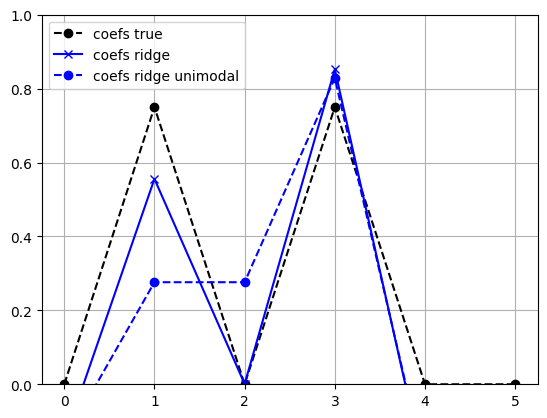

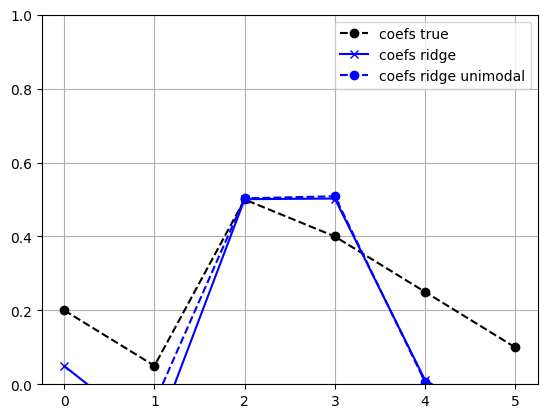

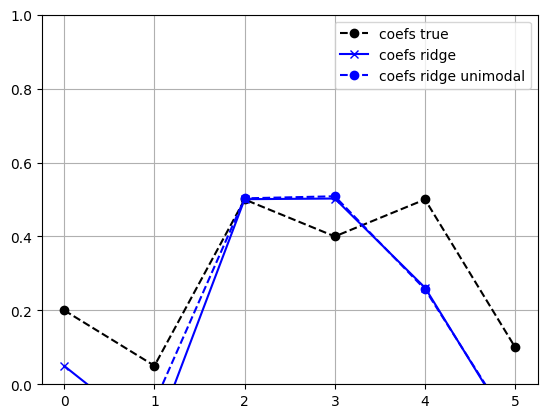

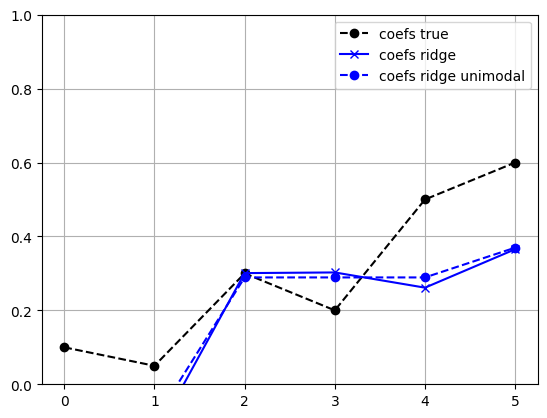

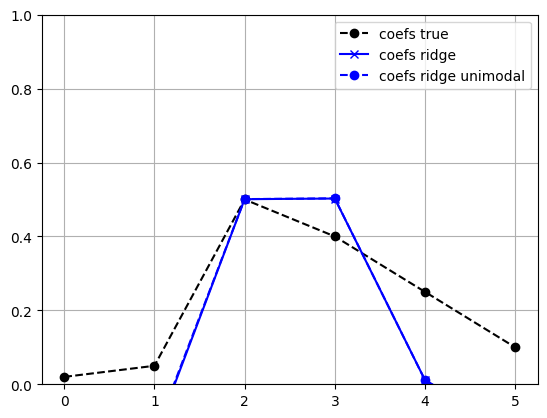

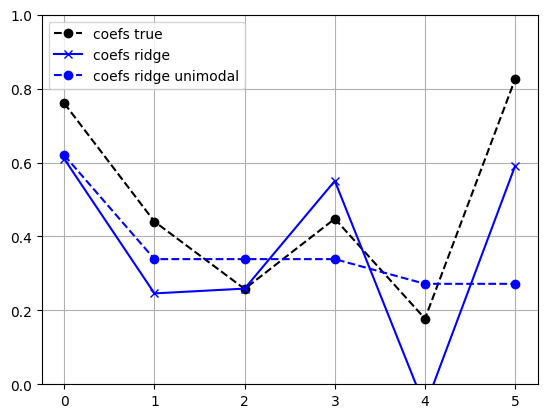

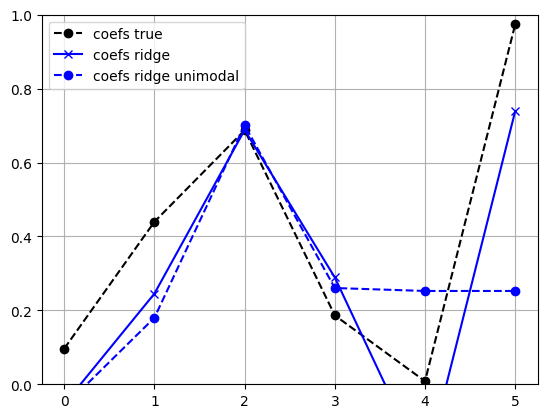

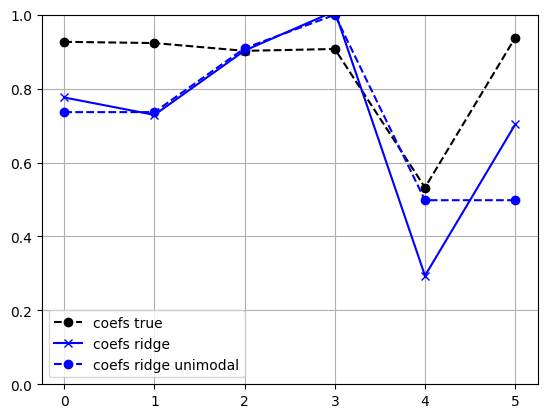

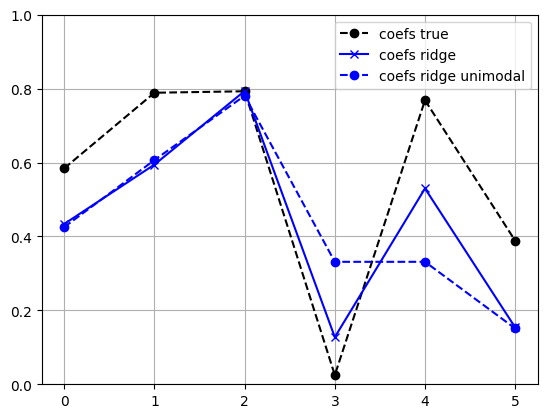

In [119]:
from sklearn.linear_model import Ridge
import scipy.stats
import time
import matplotlib.pyplot as plt
# trial solving constrained coefficients
rand_seed = 121
n=900
n_feats = 6
np.random.seed(rand_seed)
X = np.random.rand(n*n_feats).reshape(n,n_feats)
coefs_all = [
        # np.array( [0.3301689,  0.61111695, 0.09211307, 0.51328358, 0.06750287, 0.52555932]),
            np.array([0.,0.75,0.,.75,0.,0]),
             np.array([0.2,0.05,0.5,.4,0.25,0.1]),
             np.array([0.2,0.05,0.5,.4,0.5,0.1]),
             np.array([0.1,0.05,0.3,.2,0.5,0.6]),
            np.array([0.02,0.05,0.5,.4,0.25,0.1]), # prob
             np.random.rand(6),
             np.random.rand(6),
             np.random.rand(6),
             np.random.rand(6),
         ]
# unimodal_idx_groups = True
fit_intercept = True
alpha=0.01
for i_coefs, coefs in enumerate(coefs_all):
    np.random.seed(rand_seed)#+i_coefs)
    print('true coef:', coefs)

    y = np.dot(X, coefs
               ).ravel() + scipy.stats.norm(0,1).rvs(n)



    # custom Ridge
    start = time.time()
    # for i in range(100):
    reg_custom = RidgeRegression(alpha=alpha,
                                 fit_intercept=fit_intercept,
                unimodal=False)
    reg_custom.fit(X,y)
    time_s = np.round(time.time()-start,3)
    print('custom ridge:',0.5*np.sum((y-reg_custom.predict(X))**2),np.max(get_dip_values(reg_custom.coef_)),
          time_s,
          reg.intercept_, reg_custom.coef_,
          )
    fig,ax = plt.subplots()
    start = time.time()
    # for i in range(100):
    reg_custom_unimodal = RidgeRegression(alpha=alpha,
                                 fit_intercept=fit_intercept,
                unimodal=True)
    reg_custom_unimodal.fit(X,y)
    time_s = np.round(time.time()-start,3)
    print('custom ridge unimodal:',0.5*np.sum((y-reg_custom_unimodal.predict(X))**2),
          np.max(get_dip_values(reg_custom_unimodal.coef_)),
          time_s,
          reg_custom_unimodal.intercept_, reg_custom_unimodal.coef_,
          )
#
    X_coef_locn = np.arange(len(coefs))

    plt.plot(X_coef_locn,coefs, marker='o',label='coefs true', color='k', linestyle='--')
    # plt.plot(X_coef_locn,coefs_est_ls, color='r',label='coefs ls', marker='x')
    plt.plot(X_coef_locn,reg_custom.coef_, label='coefs ridge',color='b', marker='x')
    plt.plot(X_coef_locn,reg_custom_unimodal.coef_, label='coefs ridge unimodal',
                        color='b',  marker='o',linestyle='--')
    print('unimodal coefs:',reg_custom_unimodal.coef_)
    # plt.plot(X_coef_locn,coefs_est_sp_uni, label='coefs spline constrained unimodal', color='g', marker='p')
    # plt.plot(x_all,coefs_full_spline_uni, label='coefs spline constrained unimodal', color='g', linestyle='--')
    # print(np.dot(cs.derivations_mat,spl_coefs_opt_uni ))
    # print(np.dot(constraints[-2,:],spl_coefs_opt_uni ))
    plt.legend()
    plt.grid()
    plt.ylim([0,1])
    # print(calc_dip_penalty_weights(reg_custom_unimodal.coef_),
    #       calc_dip_penalty_weights(reg_custom_unimodal.coef_).dot(reg_custom_unimodal.coef_))
    # print('2 sided',calc_dip_penalty_weights_twosided(reg_custom_unimodal.coef_),
    #       calc_dip_penalty_weights_twosided(reg_custom_unimodal.coef_).dot(reg_custom_unimodal.coef_))
#
#

np.array([-0.15253716,  0.27612617,  0.27612618,  0.82850476, -0.22418673, -0.26600565]),
np.array([-0.04950415, -0.04950415,  0.50304867,  0.50865376,  0.00694265, -0.12748278]),
np.array([-0.04950671, -0.04950671,  0.50305287,  0.50865698,  0.25691133, -0.12748643]),
np.array([-0.09941247, -0.09941247,  0.28908646,  0.28908646,  0.28908646,  0.36963751]),
np.array([-0.13743962, -0.13743962,  0.50099497,  0.50307497,  0.01111545, -0.13402668]),
np.array([0.61969394 , 0.33860653 , 0.33860642 , 0.33860633 , 0.27177542 , 0.2717753 ]),
np.array([-0.05994643,  0.1801058 ,  0.70110524,  0.26040426 , 0.25248045,  0.25248045]),
np.array([0.73636598 , 0.73636598 , 0.90922988 , 0.99976239 , 0.49803944 , 0.49803944]),
np.array([0.42534316 , 0.60668949 , 0.78069408 , 0.33134332 , 0.33134333 , 0.15102768]),
]

In [116]:
coef__ = reg_custom_unimodal.coef_
qf = QuadraticFit(coef__[0],coef__[1],coef__[2],)
print(coef__[0],coef__[1],coef__[2],)
print(qf.calc_dip_metric())

0.39984451808222815 0.3998445180833039 0.3998445180821519
-0.9830271802416274


In [117]:
print('Done' ,time.time())

Done 1697680084.429006


In [11]:
from sklearn.preprocessing import StandardScaler, normalize, Normalizer
import numpy as np
ss = StandardScaler()
nn = Normalizer()
X = np.random.rand(30).reshape(3,10)
print('X1',X)
X_t = ss.fit_transform(X)
print('X2',X)
X_n = normalize(X, axis=0,return_norm=False)
print('Xt',X_t)
print('Xn',X_n)
print('Xnn',nn.fit_transform(X.T).T)

X1 [[0.73177962 0.56552364 0.10344183 0.46740716 0.02895075 0.47731282
  0.88438441 0.37094308 0.45943031 0.76911238]
 [0.88616572 0.95352917 0.81465528 0.32914197 0.80756805 0.36920697
  0.26852498 0.48868493 0.14023571 0.71150353]
 [0.63354581 0.5283637  0.01387024 0.33791188 0.03579402 0.46894706
  0.20592226 0.24314603 0.55859172 0.08101004]]
X2 [[0.73177962 0.56552364 0.10344183 0.46740716 0.02895075 0.47731282
  0.88438441 0.37094308 0.45943031 0.76911238]
 [0.88616572 0.95352917 0.81465528 0.32914197 0.80756805 0.36920697
  0.26852498 0.48868493 0.14023571 0.71150353]
 [0.63354581 0.5283637  0.01387024 0.33791188 0.03579402 0.46894706
  0.20592226 0.24314603 0.55859172 0.08101004]]
Xt [[-0.18001432 -0.60826522 -0.57840182  1.4119434  -0.71644914  0.7905707
   1.40927694  0.03342743  0.41090752  0.79750617]
 [ 1.3047895   1.40980438  1.40682719 -0.77533938  1.41417224 -1.4107894
  -0.60239429  1.20768898 -1.37736086  0.61267557]
 [-1.12477518 -0.80153916 -0.82842537 -0.63660402 -